In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import sys

##have pandas display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
 # Show all columns in df.info()

warnings.filterwarnings('ignore')

%matplotlib inline



In [2]:
df = pd.read_csv("../data/drug_data.csv")








In [3]:
df.head()

,prescription_date,prescription_year,prescription_month,day_of_week,quarter,patient_id,patient_taj,patient_name,birth_date,age_at_prescription,patient_gender,birth_place,medication_name,active_ingredient,atc_code,atc_level1,atc_level2,atc_level3,pharmaceutical_form,active_amount,active_unit,package_quantity,package_unit,ttt_code,ksz_code,package_size,dosage,prescription_status,has_status_data,is_filled,encounter_id,encounter_date,clinic_name,mep_code,medical_specialty,visit_reason,is_admin_visit,doctor_stamp,doctor_name,icd10_codes,diagnosis_names,num_diagnoses,has_diabetes_type1,has_diabetes_type2,has_diabetes_any,has_hyperlipidemia,has_obesity,has_hypothyroidism,has_hyperthyroidism,has_hypertension,has_angina,has_myocardial_infarction,has_ischemic_heart_disease,has_atrial_fibrillation,has_heart_failure,has_cerebrovascular_disease,has_stroke,has_peripheral_vascular_disease,has_asthma,has_copd,has_pneumonia,has_dementia,has_schizophrenia,has_mood_disorder,has_depression,has_anxiety_disorder,has_substance_abuse,has_rheumatoid_arthritis,has_osteoarthritis,has_osteoporosis,has_chronic_kidney_disease,has_acute_kidney_failure,has_cancer,has_breast_cancer,has_lung_cancer,has_colorectal_cancer,has_peptic_ulcer,has_inflammatory_bowel_disease,has_liver_disease,is_pregnant,has_injury,has_infectious_disease,has_blood_disorder,has_neurological_disorder,has_eye_disorder,has_ear_disorder,has_skin_disorder,has_symptoms_signs_abnormal_findings,data_source,prescription_number
0,2023-02-22 17:47:44.000,2023,2,3,1,H32001000001,NaN,NaN,NaN,NaN,NaN,NaN,ALGOPYRIN 500 MG TABLETTA,metamizol-nátrium,N02BB02,N,N02,N02B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10x buborékcsomagolásban,1x1,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82798,GYŐRI-DANI VERONIKA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EESZT,1
1,2023-02-22 17:36:49.000,2023,2,3,1,H32001000001,NaN,NaN,NaN,NaN,NaN,NaN,LORDESTIN 5 MG FILMTABLETTA,desloratadin,R06AX27,R,R06,R06A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30x buborékcsomagolásban,NaN,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59711,LENGYEL ANNA ANDREA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EESZT,1
2,2023-02-22 17:36:49.000,2023,2,3,1,H32001000001,NaN,NaN,NaN,NaN,NaN,NaN,VITAMIN D3 PHARMA PATENT 30000 NE FILMTABLETTA,Colecalciferol,A11CC05,A,A11,A11C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2x PVC/PVdC // Alu buborékcsomagolásban, dobozban",utasítás szerint,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59711,LENGYEL ANNA ANDREA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EESZT,1
3,2023-07-06 18:04:29.000,2023,7,4,3,H32001000004,105 568 760,Zámbó József,1966-08-01,56.0,férfi,Nyíregyháza,BÉRES CALCIUM 500 MG FILMTABLETTA,kalcium-karbonát,A12AA04,A,A12,A12A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30x hdpe tartályban,D.S.: reggel: 1 tabletta naponta,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45875,SZABÓ LAJOS MIKLÓS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EESZT,1
4,2023-12-18 13:11:07.000,2023,12,1,4,H32001000004,105 568 760,Zámbó József,1966-08-01,57.0,férfi,Nyíregyháza,BISOPROLOL-RATIOPHARM 5 MG TABLETTA,bisoprolol,C07AB07,C,C07,C07A,tabletta,5.0,mg,30.0,db,210156821.0,30x buborékcsomagolásban,NaN,NaN,NaN,0,NaN,H32001007373,2023-12-18 12:57:39.000,Nyírkáta rendelő,NaN,Belgyógyászat,Akut ellátás,0.0,70282,Dr. Varga Beáta,"I10H0, R0000, Z0130","Magasvérnyomás-betegség (elsődleges), Tachycar...",3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45282 entries, 0 to 45281
Data columns (total 90 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   prescription_date                     45282 non-null  object 
 1   prescription_year                     45282 non-null  int64  
 2   prescription_month                    45282 non-null  int64  
 3   day_of_week                           45282 non-null  int64  
 4   quarter                               45282 non-null  int64  
 5   patient_id                            45282 non-null  object 
 6   patient_taj                           45270 non-null  object 
 7   patient_name                          45270 non-null  object 
 8   birth_date                            45270 non-null  object 
 9   age_at_prescription                   45270 non-null  float64
 10  patient_gender                        45270 non-null  object 
 11  birth_place    

In [5]:
## check for missing values in percentage
pd.Series((df.isnull().sum()/len(df))*100, index=df.columns, name='Missing Values %')
## display the values in descending order
pd.Series((df.isnull().sum()/len(df))*100, index=df.columns, name='Missing Values %').sort_values(ascending=False)





is_filled                               100.000000
mep_code                                 99.949207
active_unit                              78.788481
package_unit                             78.536725
active_amount                            76.646350
visit_reason                             75.811581
pharmaceutical_form                      75.427322
package_quantity                         75.427322
has_myocardial_infarction                75.372113
has_ischemic_heart_disease               75.372113
has_angina                               75.372113
has_pneumonia                            75.372113
has_heart_failure                        75.372113
has_cerebrovascular_disease              75.372113
has_hypertension                         75.372113
has_stroke                               75.372113
has_peripheral_vascular_disease          75.372113
has_asthma                               75.372113
has_hyperthyroidism                      75.372113
has_hypothyroidism             

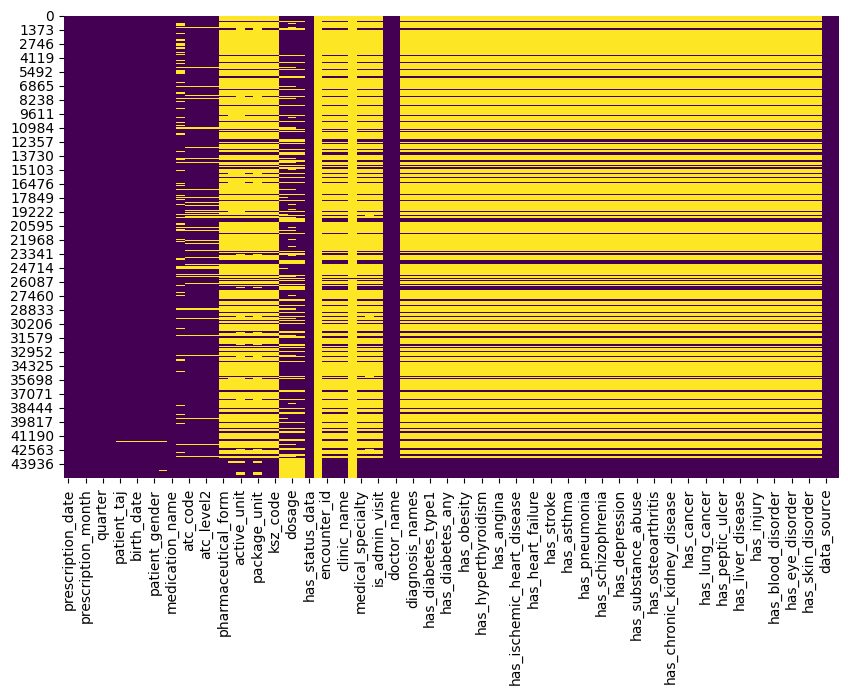

In [6]:
## visualize the missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()




In [7]:
df['prescription_month'].value_counts()

prescription_month
10    5193
9     5148
6     4218
8     4089
5     4061
11    3792
4     3601
7     3471
3     3265
2     3049
12    2974
1     2421
Name: count, dtype: int64

In [8]:
df['day_of_week'].value_counts()

day_of_week
2    10955
3    10250
1     8743
5     7364
4     6796
0      883
6      291
Name: count, dtype: int64

In [9]:
df['quarter'].value_counts()

quarter
3    12708
4    11959
2    11880
1     8735
Name: count, dtype: int64

In [10]:
print(len(df['patient_id'].unique()))
print(len(df['patient_taj'].unique()))

3260
3258


In [11]:
len(df['medication_name'].unique())

4505

In [12]:
len(df['prescription_date'].unique())


13878

In [13]:
## Normalize data_source: lowercase/trim
print("Normalizing data_source (lowercase and trim)...")
print(f"Total rows: {len(df)}")

# Check missing values before
missing_before = df['data_source'].isna().sum()
print(f"Missing data_source values: {missing_before}")
print(f"Non-missing data_source values: {df['data_source'].notna().sum()}")

# Store original for comparison
original_data_source = df['data_source'].copy()

# Show sample before
print("\nSample data_source values before normalization:")
print(df['data_source'].head(10))

# Convert to lowercase and trim whitespace (only for non-null values)
df['data_source'] = df['data_source'].where(
    df['data_source'].isna(),
    df['data_source'].astype(str).str.lower().str.strip()
)

# Replace 'nan' strings back to actual NaN
df['data_source'] = df['data_source'].replace('nan', np.nan).replace('', np.nan)

# Show sample after normalization
print("\nSample data_source values after normalization:")
print(df['data_source'].head(10))

# Check for changes
changes = (original_data_source.fillna('').astype(str).str.lower().str.strip() != df['data_source'].fillna('').astype(str)).sum()
print(f"\nTotal values changed: {changes}")
print(f"Percentage changed: {(changes/len(df))*100:.2f}%")

# Final summary
print("\n" + "="*50)
print("Final summary:")
print(f"Total rows: {len(df)}")
print(f"Non-missing data_source: {df['data_source'].notna().sum()}")
print(f"Missing data_source: {df['data_source'].isna().sum()}")
print(f"Unique data_source values: {df['data_source'].nunique()}")
print("\nValue counts:")
print(df['data_source'].value_counts(dropna=False))

Normalizing data_source (lowercase and trim)...
Total rows: 45282
Missing data_source values: 0
Non-missing data_source values: 45282

Sample data_source values before normalization:
0       EESZT
1       EESZT
2       EESZT
3       EESZT
4    INTERNAL
5       EESZT
6       EESZT
7       EESZT
8       EESZT
9       EESZT
Name: data_source, dtype: object

Sample data_source values after normalization:
0       eeszt
1       eeszt
2       eeszt
3       eeszt
4    internal
5       eeszt
6       eeszt
7       eeszt
8       eeszt
9       eeszt
Name: data_source, dtype: object

Total values changed: 0
Percentage changed: 0.00%

Final summary:
Total rows: 45282
Non-missing data_source: 45282
Missing data_source: 0
Unique data_source values: 2

Value counts:
data_source
eeszt       34130
internal    11152
Name: count, dtype: int64


In [14]:
df['age_at_prescription'].describe()



count    45270.000000
mean        58.814447
std         14.330689
min          0.000000
25%         50.000000
50%         60.000000
75%         69.000000
max         93.000000
Name: age_at_prescription, dtype: float64

In [15]:
df['prescription_status'].value_counts()

prescription_status
3            22989
1             7237
7             1838
Dispensed      987
6              678
Open           339
Withdrawn       59
2                3
Name: count, dtype: int64

## Handle date columns

In [16]:
## parse to datetime format (includes time component)
df['prescription_date'] = pd.to_datetime(df['prescription_date'], format='%Y-%m-%d %H:%M:%S.%f')

In [17]:
## Derive prescription_month from prescription_date and overwrite mismatches
# Store original values for comparison
original_prescription_month = df['prescription_month'].copy()

# Compute new values from prescription_date
new_prescription_month = df['prescription_date'].dt.month

# Compare and count mismatches
mismatches = (original_prescription_month != new_prescription_month).sum()
total_rows = len(df)

print(f"Total rows: {total_rows}")
print(f"Mismatches found: {mismatches}")
print(f"Percentage overwritten: {(mismatches/total_rows)*100:.2f}%")

# Show some examples of mismatches if any
if mismatches > 0:
    mismatch_mask = original_prescription_month != new_prescription_month
    print("\nSample of mismatches (original -> new):")
    mismatch_df = pd.DataFrame({
        'prescription_date': df.loc[mismatch_mask, 'prescription_date'],
        'original_month': original_prescription_month[mismatch_mask],
        'new_month': new_prescription_month[mismatch_mask]
    })
    print(mismatch_df.head(10))

# Overwrite with new values
df['prescription_month'] = new_prescription_month


Total rows: 45282
Mismatches found: 0
Percentage overwritten: 0.00%


In [18]:
## Derive day_of_week from prescription_date (0=Monday, 6=Sunday) and overwrite mismatches
# Store original values for comparison
original_day_of_week = df['day_of_week'].copy()

# Compute new values from prescription_date (0=Monday, 1=Tuesday, ..., 6=Sunday)
new_day_of_week = df['prescription_date'].dt.dayofweek

# Compare and count mismatches
mismatches = (original_day_of_week != new_day_of_week).sum()
total_rows = len(df)

print(f"Total rows: {total_rows}")
print(f"Mismatches found: {mismatches}")
print(f"Percentage overwritten: {(mismatches/total_rows)*100:.2f}%")

# Show some examples of mismatches if any
if mismatches > 0:
    mismatch_mask = original_day_of_week != new_day_of_week
    print("\nSample of mismatches (original -> new):")
    mismatch_df = pd.DataFrame({
        'prescription_date': df.loc[mismatch_mask, 'prescription_date'],
        'original_day_of_week': original_day_of_week[mismatch_mask],
        'new_day_of_week': new_day_of_week[mismatch_mask]
    })
    print(mismatch_df.head(10))

# Overwrite with new values
df['day_of_week'] = new_day_of_week


Total rows: 45282
Mismatches found: 45282
Percentage overwritten: 100.00%

Sample of mismatches (original -> new):
    prescription_date  original_day_of_week  new_day_of_week
0 2023-02-22 17:47:44                     3                2
1 2023-02-22 17:36:49                     3                2
2 2023-02-22 17:36:49                     3                2
3 2023-07-06 18:04:29                     4                3
4 2023-12-18 13:11:07                     1                0
5 2023-12-18 13:09:22                     1                0
6 2023-12-18 13:09:22                     1                0
7 2023-07-06 18:04:29                     4                3
8 2023-12-18 13:09:22                     1                0
9 2023-12-18 13:09:22                     1                0


In [19]:
## Derive prescription_year from prescription_date and overwrite mismatches
# Store original values for comparison
original_prescription_year = df['prescription_year'].copy()

# Compute new values from prescription_date
new_prescription_year = df['prescription_date'].dt.year

# Compare and count mismatches
mismatches = (original_prescription_year != new_prescription_year).sum()
total_rows = len(df)

print(f"Total rows: {total_rows}")
print(f"Mismatches found: {mismatches}")
print(f"Percentage overwritten: {(mismatches/total_rows)*100:.2f}%")

# Show some examples of mismatches if any
if mismatches > 0:
    mismatch_mask = original_prescription_year != new_prescription_year
    print("\nSample of mismatches (original -> new):")
    mismatch_df = pd.DataFrame({
        'prescription_date': df.loc[mismatch_mask, 'prescription_date'],
        'original_year': original_prescription_year[mismatch_mask],
        'new_year': new_prescription_year[mismatch_mask]
    })
    print(mismatch_df.head(10))

# Overwrite with new values
df['prescription_year'] = new_prescription_year


Total rows: 45282
Mismatches found: 0
Percentage overwritten: 0.00%


In [20]:
## Derive quarter from prescription_date and overwrite mismatches
# Store original values for comparison
original_quarter = df['quarter'].copy()

# Compute new values from prescription_date (1=Q1, 2=Q2, 3=Q3, 4=Q4)
new_quarter = df['prescription_date'].dt.quarter

# Compare and count mismatches
mismatches = (original_quarter != new_quarter).sum()
total_rows = len(df)

print(f"Total rows: {total_rows}")
print(f"Mismatches found: {mismatches}")
print(f"Percentage overwritten: {(mismatches/total_rows)*100:.2f}%")

# Show some examples of mismatches if any
if mismatches > 0:
    mismatch_mask = original_quarter != new_quarter
    print("\nSample of mismatches (original -> new):")
    mismatch_df = pd.DataFrame({
        'prescription_date': df.loc[mismatch_mask, 'prescription_date'],
        'original_quarter': original_quarter[mismatch_mask],
        'new_quarter': new_quarter[mismatch_mask]
    })
    print(mismatch_df.head(10))

# Overwrite with new values
df['quarter'] = new_quarter


Total rows: 45282
Mismatches found: 0
Percentage overwritten: 0.00%


## Keys, IDs, PII


In [21]:
## Drop PII columns
df = df.drop(columns=['patient_taj', 'patient_name', 'birth_place'])
print(f"Dropped columns: patient_taj, patient_name, birth_place")
print(f"Remaining columns: {len(df.columns)}")


Dropped columns: patient_taj, patient_name, birth_place
Remaining columns: 87


In [22]:
## Parse birth_date to date format
# Check current format
print("Sample birth_date values before parsing:")
print(df['birth_date'].head(10))
print(f"\nCurrent dtype: {df['birth_date'].dtype}")

# Parse to datetime (pandas will infer the format)
df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')

print(f"\nAfter parsing:")
print(f"New dtype: {df['birth_date'].dtype}")
print(f"Non-null values: {df['birth_date'].notna().sum()}")
print(f"Null values: {df['birth_date'].isna().sum()}")
print("\nSample birth_date values after parsing:")
print(df['birth_date'].head(10))


Sample birth_date values before parsing:
0           NaN
1           NaN
2           NaN
3    1966-08-01
4    1966-08-01
5    1966-08-01
6    1966-08-01
7    1966-08-01
8    1966-08-01
9    1966-08-01
Name: birth_date, dtype: object

Current dtype: object

After parsing:
New dtype: datetime64[ns]
Non-null values: 45270
Null values: 12

Sample birth_date values after parsing:
0          NaT
1          NaT
2          NaT
3   1966-08-01
4   1966-08-01
5   1966-08-01
6   1966-08-01
7   1966-08-01
8   1966-08-01
9   1966-08-01
Name: birth_date, dtype: datetime64[ns]


In [23]:
## Check if we can fill null birth_date values using patient_id
# Check current null values
null_count_before = df['birth_date'].isna().sum()
print(f"Null birth_date values before filling: {null_count_before}")
print(f"Total rows: {len(df)}")
print(f"Percentage null: {(null_count_before/len(df))*100:.2f}%")

# Check if patient_id has consistent birth_date values
print("\nChecking patient_id groups:")
patient_birth_date_stats = df.groupby('patient_id')['birth_date'].agg([
    ('null_count', lambda x: x.isna().sum()),
    ('non_null_count', lambda x: x.notna().sum()),
    ('unique_values', lambda x: x.dropna().nunique() if x.notna().any() else 0)
])

# Find patients with mixed null/non-null birth_date
patients_with_mixed = patient_birth_date_stats[
    (patient_birth_date_stats['null_count'] > 0) & 
    (patient_birth_date_stats['non_null_count'] > 0)
]

print(f"\nPatients with both null and non-null birth_date: {len(patients_with_mixed)}")
print(f"Patients with only null birth_date: {len(patient_birth_date_stats[patient_birth_date_stats['non_null_count'] == 0])}")
print(f"Patients with only non-null birth_date: {len(patient_birth_date_stats[patient_birth_date_stats['null_count'] == 0])}")

# Check if there are any inconsistencies (same patient_id with different birth_dates)
patients_with_multiple_dates = patient_birth_date_stats[patient_birth_date_stats['unique_values'] > 1]
print(f"\nPatients with multiple different birth_date values: {len(patients_with_multiple_dates)}")

if len(patients_with_multiple_dates) > 0:
    print("\nSample of patients with multiple birth_date values:")
    print(patients_with_multiple_dates.head(10))
    print("\nSample rows for these patients:")
    sample_patients = patients_with_multiple_dates.head(5).index
    print(df[df['patient_id'].isin(sample_patients)][['patient_id', 'birth_date']].sort_values('patient_id'))

# Fill null birth_date values using patient_id
# For each patient_id, use the first non-null birth_date value
print("\n" + "="*50)
print("Filling null birth_date values using patient_id...")

# Group by patient_id and fill nulls with the first non-null value in that group
df['birth_date'] = df.groupby('patient_id')['birth_date'].transform(
    lambda x: x.fillna(x.dropna().iloc[0]) if x.dropna().any() else x
)

null_count_after = df['birth_date'].isna().sum()
filled_count = null_count_before - null_count_after

print(f"\nNull birth_date values after filling: {null_count_after}")
print(f"Values filled: {filled_count}")
print(f"Percentage null after filling: {(null_count_after/len(df))*100:.2f}%")


Null birth_date values before filling: 12
Total rows: 45282
Percentage null: 0.03%

Checking patient_id groups:

Patients with both null and non-null birth_date: 0
Patients with only null birth_date: 3
Patients with only non-null birth_date: 3257

Patients with multiple different birth_date values: 0

Filling null birth_date values using patient_id...

Null birth_date values after filling: 12
Values filled: 0
Percentage null after filling: 0.03%


In [24]:
df['patient_gender'].value_counts()



patient_gender
nő       31690
férfi    13580
Name: count, dtype: int64

In [25]:
## Normalize patient_gender to {female, male, unknown} (lowercase)
# Check current values
print("Current patient_gender values:")
print(df['patient_gender'].value_counts(dropna=False))
print(f"\nCurrent dtype: {df['patient_gender'].dtype}")

# Store original for comparison
original_gender = df['patient_gender'].copy()

# Map Hungarian values to standard lowercase values
gender_mapping = {
    'nő': 'female',      # Hungarian for woman
    'férfi': 'male',      # Hungarian for man
    'female': 'female',
    'male': 'male',
    'f': 'female',
    'm': 'male',
    'woman': 'female',
    'man': 'male',
    'n': 'unknown',
    'u': 'unknown',
    'other': 'unknown',
    '': 'unknown'
}

# Convert to lowercase first (in case there are any uppercase variations)
df['patient_gender'] = df['patient_gender'].astype(str).str.lower()

# Handle NaN/null values - convert to 'unknown'
df['patient_gender'] = df['patient_gender'].replace('nan', 'unknown')

# Apply mapping - map known values, default to 'unknown' for anything else
df['patient_gender'] = df['patient_gender'].map(gender_mapping).fillna('unknown')

# Show results
print("\n" + "="*50)
print("After normalization:")
print(df['patient_gender'].value_counts(dropna=False))

# Show changes made
changes = (original_gender.fillna('').astype(str).str.lower() != df['patient_gender']).sum()
print(f"\nValues changed: {changes}")
print(f"Total rows: {len(df)}")

# Verify all values are in the expected set
expected_values = {'female', 'male', 'unknown'}
actual_values = set(df['patient_gender'].unique())
print(f"\nExpected values: {expected_values}")
print(f"Actual values: {actual_values}")
if actual_values == expected_values:
    print("✓ All values normalized correctly!")
else:
    print(f"⚠ Warning: Unexpected values found: {actual_values - expected_values}")


Current patient_gender values:
patient_gender
nő       31690
férfi    13580
NaN         12
Name: count, dtype: int64

Current dtype: object

After normalization:
patient_gender
female     31690
male       13580
unknown       12
Name: count, dtype: int64

Values changed: 45282
Total rows: 45282

Expected values: {'male', 'female', 'unknown'}
Actual values: {'male', 'unknown', 'female'}
✓ All values normalized correctly!


In [26]:
## Check if we can fill null/unknown patient_gender values using patient_id
# Check current values (including 'unknown' as missing)
null_or_unknown_before = (df['patient_gender'].isna() | (df['patient_gender'] == 'unknown')).sum()
print(f"Null or 'unknown' patient_gender values before filling: {null_or_unknown_before}")
print(f"Total rows: {len(df)}")
print(f"Percentage null/unknown: {(null_or_unknown_before/len(df))*100:.2f}%")

# Check if patient_id has consistent patient_gender values
print("\nChecking patient_id groups:")
patient_gender_stats = df.groupby('patient_id')['patient_gender'].agg([
    ('null_or_unknown_count', lambda x: (x.isna() | (x == 'unknown')).sum()),
    ('known_count', lambda x: (x.notna() & (x != 'unknown')).sum()),
    ('unique_known_values', lambda x: x[x.notna() & (x != 'unknown')].nunique() if (x.notna() & (x != 'unknown')).any() else 0)
])

# Find patients with mixed unknown/known patient_gender
patients_with_mixed = patient_gender_stats[
    (patient_gender_stats['null_or_unknown_count'] > 0) & 
    (patient_gender_stats['known_count'] > 0)
]

print(f"\nPatients with both unknown and known patient_gender: {len(patients_with_mixed)}")
print(f"Patients with only unknown patient_gender: {len(patient_gender_stats[patient_gender_stats['known_count'] == 0])}")
print(f"Patients with only known patient_gender: {len(patient_gender_stats[patient_gender_stats['null_or_unknown_count'] == 0])}")

# Check if there are any inconsistencies (same patient_id with different known genders)
patients_with_multiple_genders = patient_gender_stats[patient_gender_stats['unique_known_values'] > 1]
print(f"\nPatients with multiple different known patient_gender values: {len(patients_with_multiple_genders)}")

if len(patients_with_multiple_genders) > 0:
    print("\nSample of patients with multiple patient_gender values:")
    print(patients_with_multiple_genders.head(10))
    print("\nSample rows for these patients:")
    sample_patients = patients_with_multiple_genders.head(5).index
    print(df[df['patient_id'].isin(sample_patients)][['patient_id', 'patient_gender']].sort_values('patient_id'))

# Fill null/unknown patient_gender values using patient_id
# For each patient_id, use the first known (non-null, non-unknown) patient_gender value
print("\n" + "="*50)
print("Filling null/unknown patient_gender values using patient_id...")

# Create a mask for rows that need filling (null or 'unknown')
needs_filling = df['patient_gender'].isna() | (df['patient_gender'] == 'unknown')

# Group by patient_id and fill nulls/unknowns with the first known value in that group
def fill_gender(group):
    known_values = group[(group.notna()) & (group != 'unknown')]
    if len(known_values) > 0:
        # Use the most common known value, or first if tie
        most_common = known_values.mode()
        if len(most_common) > 0:
            return group.fillna(most_common.iloc[0]).replace('unknown', most_common.iloc[0])
    return group

df['patient_gender'] = df.groupby('patient_id')['patient_gender'].transform(fill_gender)

null_or_unknown_after = (df['patient_gender'].isna() | (df['patient_gender'] == 'unknown')).sum()
filled_count = null_or_unknown_before - null_or_unknown_after

print(f"\nNull or 'unknown' patient_gender values after filling: {null_or_unknown_after}")
print(f"Values filled: {filled_count}")
print(f"Percentage null/unknown after filling: {(null_or_unknown_after/len(df))*100:.2f}%")

# Show final distribution
print("\nFinal patient_gender distribution:")
print(df['patient_gender'].value_counts(dropna=False))


Null or 'unknown' patient_gender values before filling: 12
Total rows: 45282
Percentage null/unknown: 0.03%

Checking patient_id groups:

Patients with both unknown and known patient_gender: 0
Patients with only unknown patient_gender: 3
Patients with only known patient_gender: 3257

Patients with multiple different known patient_gender values: 0

Filling null/unknown patient_gender values using patient_id...

Null or 'unknown' patient_gender values after filling: 12
Values filled: 0
Percentage null/unknown after filling: 0.03%

Final patient_gender distribution:
patient_gender
female     31690
male       13580
unknown       12
Name: count, dtype: int64


In [27]:
## handle prescription_number later
# df['prescription_number'].value_counts()

In [28]:
## Normalize medication_name: lowercase and trim whitespace
# Check current values
print("Normalizing medication_name (lowercase and trim)...")
print(f"Total rows: {len(df)}")

# Store original for comparison
original_medication_name = df['medication_name'].copy()

# Show sample before
print("\nSample medication_name values before normalization:")
print(df['medication_name'].head(10))

# Convert to lowercase and trim whitespace
df['medication_name'] = df['medication_name'].astype(str).str.lower().str.strip()

# Show sample after
print("\nSample medication_name values after normalization:")
print(df['medication_name'].head(10))

# Check for changes
changes = (original_medication_name.astype(str) != df['medication_name']).sum()
print(f"\nValues changed: {changes}")
print(f"Percentage changed: {(changes/len(df))*100:.2f}%")

# Show some examples of changes if any
if changes > 0:
    change_mask = (original_medication_name.astype(str) != df['medication_name'])
    print("\nSample of changes (original -> normalized):")
    change_df = pd.DataFrame({
        'original': original_medication_name[change_mask].head(10),
        'normalized': df.loc[change_mask, 'medication_name'].head(10)
    })
    print(change_df)

# Check for empty strings after normalization
empty_after = (df['medication_name'] == '').sum()
if empty_after > 0:
    print(f"\n⚠ Warning: {empty_after} empty medication_name values after normalization")
else:
    print("\n✓ No empty medication_name values")

print(f"\nUnique medication_name values: {df['medication_name'].nunique()}")



Normalizing medication_name (lowercase and trim)...
Total rows: 45282

Sample medication_name values before normalization:
0                            ALGOPYRIN 500 MG TABLETTA
1                          LORDESTIN 5 MG FILMTABLETTA
2       VITAMIN D3 PHARMA PATENT 30000 NE FILMTABLETTA
3                    BÉRES CALCIUM 500 MG FILMTABLETTA
4                  BISOPROLOL-RATIOPHARM 5 MG TABLETTA
5               CO-DALNESSA 4 MG/5 MG/1,25 MG TABLETTA
6               CO-DALNESSA 4 MG/5 MG/1,25 MG TABLETTA
7                       EBRANTIL 90 MG RETARD KAPSZULA
8    ESOMEPRAZOL SANDOZ 40 MG GYOMORNEDV-ELLENÁLLÓ ...
9    ESOMEPRAZOL SANDOZ 40 MG GYOMORNEDV-ELLENÁLLÓ ...
Name: medication_name, dtype: object

Sample medication_name values after normalization:
0                            algopyrin 500 mg tabletta
1                          lordestin 5 mg filmtabletta
2       vitamin d3 pharma patent 30000 ne filmtabletta
3                    béres calcium 500 mg filmtabletta
4                 

In [29]:
## Normalize active_ingredient: lowercase/trim and create presence flag
# Check current values
print("Normalizing active_ingredient (lowercase and trim)...")
print(f"Total rows: {len(df)}")

# Check missing values before
missing_before = df['active_ingredient'].isna().sum()
print(f"Missing active_ingredient values: {missing_before}")
print(f"Non-missing active_ingredient values: {df['active_ingredient'].notna().sum()}")

# Store original for comparison
original_active_ingredient = df['active_ingredient'].copy()

# Show sample before
print("\nSample active_ingredient values before normalization:")
print(df['active_ingredient'].head(10))

# Convert to lowercase and trim whitespace (only for non-null values)
# Use .where() to preserve NaN values
df['active_ingredient'] = df['active_ingredient'].where(
    df['active_ingredient'].isna(),
    df['active_ingredient'].astype(str).str.lower().str.strip()
)

# Replace 'nan' strings (from converting NaN to string) back to actual NaN
df['active_ingredient'] = df['active_ingredient'].replace('nan', np.nan)

# Show sample after
print("\nSample active_ingredient values after normalization:")
print(df['active_ingredient'].head(10))

# Check for changes
changes = (original_active_ingredient.fillna('').astype(str) != df['active_ingredient'].fillna('').astype(str)).sum()
print(f"\nValues changed: {changes}")
print(f"Percentage changed: {(changes/len(df))*100:.2f}%")

# Show some examples of changes if any
if changes > 0:
    change_mask = (original_active_ingredient.fillna('').astype(str) != df['active_ingredient'].fillna('').astype(str))
    print("\nSample of changes (original -> normalized):")
    change_df = pd.DataFrame({
        'original': original_active_ingredient[change_mask].head(10),
        'normalized': df.loc[change_mask, 'active_ingredient'].head(10)
    })
    print(change_df)

# Create presence flag: has_active_ingredient (1 if present, 0 if missing)
print("\n" + "="*50)
print("Creating has_active_ingredient flag...")

df['has_active_ingredient'] = (df['active_ingredient'].notna() & (df['active_ingredient'] != '')).astype(int)

# Show flag distribution
print("\nhas_active_ingredient flag distribution:")
print(df['has_active_ingredient'].value_counts().sort_index())

print(f"\nRows with active_ingredient: {df['has_active_ingredient'].sum()}")
print(f"Rows without active_ingredient: {(df['has_active_ingredient'] == 0).sum()}")
print(f"Percentage with active_ingredient: {(df['has_active_ingredient'].sum()/len(df))*100:.2f}%")

print(f"\nUnique active_ingredient values: {df['active_ingredient'].nunique()}")



Normalizing active_ingredient (lowercase and trim)...
Total rows: 45282
Missing active_ingredient values: 8552
Non-missing active_ingredient values: 36730

Sample active_ingredient values before normalization:
0                         metamizol-nátrium
1                              desloratadin
2                            Colecalciferol
3                          kalcium-karbonát
4                                bisoprolol
5    perindopril, amlodipine and indapamide
6    perindopril, amlodipine and indapamide
7                                  urapidil
8                               esomeprazol
9                               esomeprazol
Name: active_ingredient, dtype: object

Sample active_ingredient values after normalization:
0                         metamizol-nátrium
1                              desloratadin
2                            colecalciferol
3                          kalcium-karbonát
4                                bisoprolol
5    perindopril, amlodipine and inda

In [30]:
## Normalize atc_code: uppercase/trim, validate structure, backfill ATC levels
print("Normalizing atc_code (uppercase and trim)...")
print(f"Total rows: {len(df)}")

# Check missing values before
missing_before = df['atc_code'].isna().sum()
print(f"Missing atc_code values: {missing_before}")
print(f"Non-missing atc_code values: {df['atc_code'].notna().sum()}")

# Store original for comparison
original_atc_code = df['atc_code'].copy()

# Show sample before
print("\nSample atc_code values before normalization:")
print(df['atc_code'].head(10))

# Convert to uppercase and trim whitespace (only for non-null values)
df['atc_code'] = df['atc_code'].where(
    df['atc_code'].isna(),
    df['atc_code'].astype(str).str.upper().str.strip()
)

# Replace 'nan' strings back to actual NaN
df['atc_code'] = df['atc_code'].replace('nan', np.nan).replace('', np.nan)

# Show sample after
print("\nSample atc_code values after normalization:")
print(df['atc_code'].head(10))

# Validate ATC code structure
# ATC codes typically follow pattern: [Letter][2 digits][2 letters][2 digits][2 letters]...
# Valid format: starts with 1 letter, followed by digits/letters
print("\n" + "="*50)
print("Validating ATC code structure...")

def is_valid_atc_code(code):
    """Check if ATC code has valid structure"""
    if pd.isna(code) or code == '':
        return False
    code_str = str(code).strip()
    # ATC code should start with a letter, followed by alphanumeric characters
    # Minimum length is typically 3 characters (e.g., "A10")
    if len(code_str) < 3:
        return False
    # First character should be a letter
    if not code_str[0].isalpha():
        return False
    # Rest should be alphanumeric
    if not code_str[1:].replace('-', '').isalnum():
        return False
    return True

df['atc_code_valid'] = df['atc_code'].apply(is_valid_atc_code)

invalid_count = (df['atc_code_valid'] == False).sum()
print(f"Valid atc_code values: {(df['atc_code_valid'] == True).sum()}")
print(f"Invalid atc_code values: {invalid_count}")

if invalid_count > 0:
    print("\nSample invalid atc_code values:")
    invalid_codes = df[df['atc_code_valid'] == False]['atc_code'].dropna().unique()[:10]
    print(invalid_codes)

# Backfill ATC levels from atc_code if missing
print("\n" + "="*50)
print("Backfilling ATC levels from atc_code...")

def extract_atc_level(code, level):
    """Extract ATC level from code
    Level 1: first 1 char (e.g., 'A')
    Level 2: first 3 chars (e.g., 'A10')
    Level 3: first 5 chars (e.g., 'A10BA')
    Level 4: first 7 chars (e.g., 'A10BA01')
    """
    if pd.isna(code) or not is_valid_atc_code(code):
        return np.nan
    code_str = str(code).strip().replace('-', '')  # Remove hyphens if present
    if level == 1 and len(code_str) >= 1:
        return code_str[0]
    elif level == 2 and len(code_str) >= 3:
        return code_str[:3]
    elif level == 3 and len(code_str) >= 5:
        return code_str[:5]
    elif level == 4 and len(code_str) >= 7:
        return code_str[:7]
    return np.nan

# Check which ATC level columns exist
atc_level_columns = ['atc_level1', 'atc_level2', 'atc_level3', 'atc_level4']
existing_atc_levels = [col for col in atc_level_columns if col in df.columns]

print(f"Existing ATC level columns: {existing_atc_levels}")

# Backfill each level if missing
for i, level_col in enumerate(existing_atc_levels, start=1):
    missing_before = df[level_col].isna().sum()
    if missing_before > 0:
        # Only backfill where atc_code is valid and level is missing
        mask = df[level_col].isna() & df['atc_code_valid']
        if mask.sum() > 0:
            df.loc[mask, level_col] = df.loc[mask, 'atc_code'].apply(lambda x: extract_atc_level(x, i))
            missing_after = df[level_col].isna().sum()
            filled = missing_before - missing_after
            print(f"\n{level_col}:")
            print(f"  Missing before: {missing_before}")
            print(f"  Filled from atc_code: {filled}")
            print(f"  Missing after: {missing_after}")
    else:
        print(f"\n{level_col}: No missing values to backfill")

# Summary
print("\n" + "="*50)
print("Summary:")
print(f"Total rows: {len(df)}")
print(f"Valid atc_code: {(df['atc_code_valid'] == True).sum()}")
print(f"Invalid atc_code: {invalid_count}")
print(f"Missing atc_code: {df['atc_code'].isna().sum()}")

# Drop the temporary validation column
df = df.drop(columns=['atc_code_valid'])



Normalizing atc_code (uppercase and trim)...
Total rows: 45282
Missing atc_code values: 3870
Non-missing atc_code values: 41412

Sample atc_code values before normalization:
0    N02BB02
1    R06AX27
2    A11CC05
3    A12AA04
4    C07AB07
5    C09BX01
6    C09BX01
7    C02CA06
8    A02BC05
9    A02BC05
Name: atc_code, dtype: object

Sample atc_code values after normalization:
0    N02BB02
1    R06AX27
2    A11CC05
3    A12AA04
4    C07AB07
5    C09BX01
6    C09BX01
7    C02CA06
8    A02BC05
9    A02BC05
Name: atc_code, dtype: object

Validating ATC code structure...
Valid atc_code values: 41411
Invalid atc_code values: 3871

Sample invalid atc_code values:
['-']

Backfilling ATC levels from atc_code...
Existing ATC level columns: ['atc_level1', 'atc_level2', 'atc_level3']

Summary:
Total rows: 45282
Valid atc_code: 41411
Invalid atc_code: 3871
Missing atc_code: 3870


In [31]:
## Normalize atc_level1: uppercase/trim, derive from atc_code if missing
print("Normalizing atc_level1 (uppercase and trim)...")
print(f"Total rows: {len(df)}")

# Check missing values before
missing_before = df['atc_level1'].isna().sum()
print(f"Missing atc_level1 values: {missing_before}")
print(f"Non-missing atc_level1 values: {df['atc_level1'].notna().sum()}")

# Store original for comparison
original_atc_level1 = df['atc_level1'].copy()

# Show sample before
print("\nSample atc_level1 values before normalization:")
print(df['atc_level1'].head(10))

# Convert to uppercase and trim whitespace (only for non-null values)
df['atc_level1'] = df['atc_level1'].where(
    df['atc_level1'].isna(),
    df['atc_level1'].astype(str).str.upper().str.strip()
)

# Replace 'nan' strings back to actual NaN
df['atc_level1'] = df['atc_level1'].replace('nan', np.nan).replace('', np.nan)

# Show sample after normalization
print("\nSample atc_level1 values after normalization:")
print(df['atc_level1'].head(10))

# Derive from atc_code if still missing
print("\n" + "="*50)
print("Deriving atc_level1 from atc_code where missing...")

# Check how many are missing after normalization
missing_after_normalize = df['atc_level1'].isna().sum()
print(f"Missing atc_level1 after normalization: {missing_after_normalize}")

# Derive from atc_code (level 1 is the first character)
def derive_atc_level1(row):
    """Derive atc_level1 from atc_code (first character)"""
    if pd.notna(row['atc_level1']):
        return row['atc_level1']
    if pd.notna(row['atc_code']):
        code_str = str(row['atc_code']).strip().replace('-', '')
        if len(code_str) >= 1 and code_str[0].isalpha():
            return code_str[0].upper()
    return np.nan

# Apply derivation where atc_level1 is missing
mask_missing = df['atc_level1'].isna()
if mask_missing.sum() > 0:
    df.loc[mask_missing, 'atc_level1'] = df.loc[mask_missing].apply(derive_atc_level1, axis=1)
    missing_after_derive = df['atc_level1'].isna().sum()
    derived_count = missing_after_normalize - missing_after_derive
    print(f"Derived from atc_code: {derived_count}")
    print(f"Still missing: {missing_after_derive}")
else:
    print("No missing values to derive")

# Check for changes
changes = (original_atc_level1.fillna('').astype(str).str.upper().str.strip() != df['atc_level1'].fillna('').astype(str)).sum()
print(f"\nTotal values changed: {changes}")
print(f"Percentage changed: {(changes/len(df))*100:.2f}%")

# Show some examples of changes if any
if changes > 0:
    change_mask = (original_atc_level1.fillna('').astype(str).str.upper().str.strip() != df['atc_level1'].fillna('').astype(str))
    print("\nSample of changes (original -> normalized/derived):")
    change_df = pd.DataFrame({
        'original': original_atc_level1[change_mask].head(10),
        'normalized': df.loc[change_mask, 'atc_level1'].head(10),
        'atc_code': df.loc[change_mask, 'atc_code'].head(10)
    })
    print(change_df)

# Final summary
print("\n" + "="*50)
print("Final summary:")
print(f"Total rows: {len(df)}")
print(f"Non-missing atc_level1: {df['atc_level1'].notna().sum()}")
print(f"Missing atc_level1: {df['atc_level1'].isna().sum()}")
print(f"Unique atc_level1 values: {df['atc_level1'].nunique()}")
print("\nValue counts:")
print(df['atc_level1'].value_counts(dropna=False).head(10))



Normalizing atc_level1 (uppercase and trim)...
Total rows: 45282
Missing atc_level1 values: 3870
Non-missing atc_level1 values: 41412

Sample atc_level1 values before normalization:
0    N
1    R
2    A
3    A
4    C
5    C
6    C
7    C
8    A
9    A
Name: atc_level1, dtype: object

Sample atc_level1 values after normalization:
0    N
1    R
2    A
3    A
4    C
5    C
6    C
7    C
8    A
9    A
Name: atc_level1, dtype: object

Deriving atc_level1 from atc_code where missing...
Missing atc_level1 after normalization: 3870
Derived from atc_code: 0
Still missing: 3870

Total values changed: 0
Percentage changed: 0.00%

Final summary:
Total rows: 45282
Non-missing atc_level1: 41412
Missing atc_level1: 3870
Unique atc_level1 values: 16

Value counts:
atc_level1
C      15268
A       7721
N       4942
NaN     3870
M       3851
R       2642
B       2630
J       1801
H        603
G        532
Name: count, dtype: int64


In [32]:
## Normalize atc_level2: uppercase/trim, derive from atc_code if missing
print("Normalizing atc_level2 (uppercase and trim)...")
print(f"Total rows: {len(df)}")

# Check missing values before
missing_before = df['atc_level2'].isna().sum()
print(f"Missing atc_level2 values: {missing_before}")
print(f"Non-missing atc_level2 values: {df['atc_level2'].notna().sum()}")

# Store original for comparison
original_atc_level2 = df['atc_level2'].copy()

# Show sample before
print("\nSample atc_level2 values before normalization:")
print(df['atc_level2'].head(10))

# Convert to uppercase and trim whitespace (only for non-null values)
df['atc_level2'] = df['atc_level2'].where(
    df['atc_level2'].isna(),
    df['atc_level2'].astype(str).str.upper().str.strip()
)

# Replace 'nan' strings back to actual NaN
df['atc_level2'] = df['atc_level2'].replace('nan', np.nan).replace('', np.nan)

# Show sample after normalization
print("\nSample atc_level2 values after normalization:")
print(df['atc_level2'].head(10))

# Derive from atc_code if still missing
print("\n" + "="*50)
print("Deriving atc_level2 from atc_code where missing...")

# Check how many are missing after normalization
missing_after_normalize = df['atc_level2'].isna().sum()
print(f"Missing atc_level2 after normalization: {missing_after_normalize}")

# Derive from atc_code (level 2 is the first 3 characters)
def derive_atc_level2(row):
    """Derive atc_level2 from atc_code (first 3 characters)"""
    if pd.notna(row['atc_level2']):
        return row['atc_level2']
    if pd.notna(row['atc_code']):
        code_str = str(row['atc_code']).strip().replace('-', '')
        if len(code_str) >= 3:
            return code_str[:3].upper()
    return np.nan

# Apply derivation where atc_level2 is missing
mask_missing = df['atc_level2'].isna()
if mask_missing.sum() > 0:
    df.loc[mask_missing, 'atc_level2'] = df.loc[mask_missing].apply(derive_atc_level2, axis=1)
    missing_after_derive = df['atc_level2'].isna().sum()
    derived_count = missing_after_normalize - missing_after_derive
    print(f"Derived from atc_code: {derived_count}")
    print(f"Still missing: {missing_after_derive}")
else:
    print("No missing values to derive")

# Check for changes
changes = (original_atc_level2.fillna('').astype(str).str.upper().str.strip() != df['atc_level2'].fillna('').astype(str)).sum()
print(f"\nTotal values changed: {changes}")
print(f"Percentage changed: {(changes/len(df))*100:.2f}%")

# Final summary
print("\n" + "="*50)
print("Final summary:")
print(f"Total rows: {len(df)}")
print(f"Non-missing atc_level2: {df['atc_level2'].notna().sum()}")
print(f"Missing atc_level2: {df['atc_level2'].isna().sum()}")
print(f"Unique atc_level2 values: {df['atc_level2'].nunique()}")
print("\nValue counts:")
print(df['atc_level2'].value_counts(dropna=False).head(10))



Normalizing atc_level2 (uppercase and trim)...
Total rows: 45282
Missing atc_level2 values: 3870
Non-missing atc_level2 values: 41412

Sample atc_level2 values before normalization:
0    N02
1    R06
2    A11
3    A12
4    C07
5    C09
6    C09
7    C02
8    A02
9    A02
Name: atc_level2, dtype: object

Sample atc_level2 values after normalization:
0    N02
1    R06
2    A11
3    A12
4    C07
5    C09
6    C09
7    C02
8    A02
9    A02
Name: atc_level2, dtype: object

Deriving atc_level2 from atc_code where missing...
Missing atc_level2 after normalization: 3870
Derived from atc_code: 0
Still missing: 3870

Total values changed: 0
Percentage changed: 0.00%

Final summary:
Total rows: 45282
Non-missing atc_level2: 41412
Missing atc_level2: 3870
Unique atc_level2 values: 81

Value counts:
atc_level2
C09    5675
NaN    3870
C10    3222
A02    2972
M01    2592
C07    2499
A10    2173
N05    1936
B01    1926
R03    1667
Name: count, dtype: int64


In [33]:
## Normalize atc_level3: uppercase/trim, derive from atc_code if missing, create has_atc3 flag
print("Normalizing atc_level3 (uppercase and trim)...")
print(f"Total rows: {len(df)}")

# Check missing values before
missing_before = df['atc_level3'].isna().sum()
print(f"Missing atc_level3 values: {missing_before}")
print(f"Non-missing atc_level3 values: {df['atc_level3'].notna().sum()}")

# Store original for comparison
original_atc_level3 = df['atc_level3'].copy()

# Show sample before
print("\nSample atc_level3 values before normalization:")
print(df['atc_level3'].head(10))

# Convert to uppercase and trim whitespace (only for non-null values)
df['atc_level3'] = df['atc_level3'].where(
    df['atc_level3'].isna(),
    df['atc_level3'].astype(str).str.upper().str.strip()
)

# Replace 'nan' strings back to actual NaN
df['atc_level3'] = df['atc_level3'].replace('nan', np.nan).replace('', np.nan)

# Show sample after normalization
print("\nSample atc_level3 values after normalization:")
print(df['atc_level3'].head(10))

# Derive from atc_code if still missing
print("\n" + "="*50)
print("Deriving atc_level3 from atc_code where missing...")

# Check how many are missing after normalization
missing_after_normalize = df['atc_level3'].isna().sum()
print(f"Missing atc_level3 after normalization: {missing_after_normalize}")

# Derive from atc_code (level 3 is the first 5 characters)
def derive_atc_level3(row):
    """Derive atc_level3 from atc_code (first 5 characters)"""
    if pd.notna(row['atc_level3']):
        return row['atc_level3']
    if pd.notna(row['atc_code']):
        code_str = str(row['atc_code']).strip().replace('-', '')
        if len(code_str) >= 5:
            return code_str[:5].upper()
        elif len(code_str) >= 4:
            return code_str[:4].upper()
        elif len(code_str) >= 3:
            return code_str[:3].upper()
    return np.nan

# Apply derivation where atc_level3 is missing
mask_missing = df['atc_level3'].isna()
if mask_missing.sum() > 0:
    df.loc[mask_missing, 'atc_level3'] = df.loc[mask_missing].apply(derive_atc_level3, axis=1)
    missing_after_derive = df['atc_level3'].isna().sum()
    derived_count = missing_after_normalize - missing_after_derive
    print(f"Derived from atc_code: {derived_count}")
    print(f"Still missing: {missing_after_derive}")
else:
    print("No missing values to derive")

# Check for changes
changes = (original_atc_level3.fillna('').astype(str).str.upper().str.strip() != df['atc_level3'].fillna('').astype(str)).sum()
print(f"\nTotal values changed: {changes}")
print(f"Percentage changed: {(changes/len(df))*100:.2f}%")

# Create has_atc3 flag: 1 if atc_level3 is present, 0 if missing
print("\n" + "="*50)
print("Creating has_atc3 flag...")

df['has_atc3'] = (df['atc_level3'].notna() & (df['atc_level3'] != '')).astype(int)

# Show flag distribution
print("\nhas_atc3 flag distribution:")
print(df['has_atc3'].value_counts().sort_index())

print(f"\nRows with atc_level3: {df['has_atc3'].sum()}")
print(f"Rows without atc_level3: {(df['has_atc3'] == 0).sum()}")
print(f"Percentage with atc_level3: {(df['has_atc3'].sum()/len(df))*100:.2f}%")

# Final summary
print("\n" + "="*50)
print("Final summary:")
print(f"Total rows: {len(df)}")
print(f"Non-missing atc_level3: {df['atc_level3'].notna().sum()}")
print(f"Missing atc_level3: {df['atc_level3'].isna().sum()}")
print(f"Unique atc_level3 values: {df['atc_level3'].nunique()}")
print("\nValue counts:")
print(df['atc_level3'].value_counts(dropna=False).head(10))



Normalizing atc_level3 (uppercase and trim)...
Total rows: 45282
Missing atc_level3 values: 3870
Non-missing atc_level3 values: 41412

Sample atc_level3 values before normalization:
0    N02B
1    R06A
2    A11C
3    A12A
4    C07A
5    C09B
6    C09B
7    C02C
8    A02B
9    A02B
Name: atc_level3, dtype: object

Sample atc_level3 values after normalization:
0    N02B
1    R06A
2    A11C
3    A12A
4    C07A
5    C09B
6    C09B
7    C02C
8    A02B
9    A02B
Name: atc_level3, dtype: object

Deriving atc_level3 from atc_code where missing...
Missing atc_level3 after normalization: 3870
Derived from atc_code: 0
Still missing: 3870

Total values changed: 0
Percentage changed: 0.00%

Creating has_atc3 flag...

has_atc3 flag distribution:
has_atc3
0     3870
1    41412
Name: count, dtype: int64

Rows with atc_level3: 41412
Rows without atc_level3: 3870
Percentage with atc_level3: 91.45%

Final summary:
Total rows: 45282
Non-missing atc_level3: 41412
Missing atc_level3: 3870
Unique atc_level3 

In [34]:
## Normalize pharmaceutical_form: lowercase/trim, standardize common forms, create presence flag
print("Normalizing pharmaceutical_form (lowercase and trim)...")
print(f"Total rows: {len(df)}")

# Check missing values before
missing_before = df['pharmaceutical_form'].isna().sum()
print(f"Missing pharmaceutical_form values: {missing_before}")
print(f"Non-missing pharmaceutical_form values: {df['pharmaceutical_form'].notna().sum()}")

# Store original for comparison
original_pharmaceutical_form = df['pharmaceutical_form'].copy()

# Show sample before
print("\nSample pharmaceutical_form values before normalization:")
print(df['pharmaceutical_form'].value_counts(dropna=False).head(15))

# Convert to lowercase and trim whitespace (only for non-null values)
df['pharmaceutical_form'] = df['pharmaceutical_form'].where(
    df['pharmaceutical_form'].isna(),
    df['pharmaceutical_form'].astype(str).str.lower().str.strip()
)

# Replace 'nan' strings back to actual NaN
df['pharmaceutical_form'] = df['pharmaceutical_form'].replace('nan', np.nan).replace('', np.nan)

# Standardize common forms
print("\n" + "="*50)
print("Standardizing common pharmaceutical forms...")

# Define mapping for common forms
form_mapping = {
    # Tablets
    'tablet': 'tablet',
    'tabletta': 'tablet',
    'tab': 'tablet',
    'tbl': 'tablet',
    'tabl': 'tablet',
    'tabletten': 'tablet',
    'tabletten': 'tablet',
    'filmtablet': 'tablet',
    'filmtabletta': 'tablet',
    'tabletta filmbevonatú': 'tablet',
    'tabletta bevont': 'tablet',
    
    # Capsules
    'capsule': 'capsule',
    'kapszula': 'capsule',
    'cap': 'capsule',
    'caps': 'capsule',
    'kapsz': 'capsule',
    'kapszula kemény': 'capsule',
    'kapszula puha': 'capsule',
    
    # Solutions
    'solution': 'solution',
    'oldat': 'solution',
    'sol': 'solution',
    'old': 'solution',
    'injekció': 'solution',
    'injection': 'solution',
    'inj': 'solution',
    'infúzió': 'solution',
    'infusion': 'solution',
}

# Apply standardization
# First, try exact matches
df['pharmaceutical_form'] = df['pharmaceutical_form'].map(form_mapping).fillna(df['pharmaceutical_form'])

# Then try partial matches (contains keyword)
def standardize_form(form):
    """Standardize form based on keywords"""
    if pd.isna(form):
        return form
    form_lower = str(form).lower()
    
    # Check for tablet keywords
    if any(keyword in form_lower for keyword in ['tablet', 'tabl', 'filmtablet']):
        return 'tablet'
    # Check for capsule keywords
    elif any(keyword in form_lower for keyword in ['capsule', 'kapszula', 'kapsz']):
        return 'capsule'
    # Check for solution keywords
    elif any(keyword in form_lower for keyword in ['solution', 'oldat', 'injekció', 'injection', 'infúzió', 'infusion']):
        return 'solution'
    
    return form

# Apply partial matching for forms not in exact mapping
mask_not_standardized = ~df['pharmaceutical_form'].isin(['tablet', 'capsule', 'solution', np.nan])
if mask_not_standardized.sum() > 0:
    df.loc[mask_not_standardized, 'pharmaceutical_form'] = df.loc[mask_not_standardized, 'pharmaceutical_form'].apply(standardize_form)

# Show results
print("\nSample pharmaceutical_form values after normalization:")
print(df['pharmaceutical_form'].value_counts(dropna=False).head(20))

# Show standardization results
standardized_forms = df['pharmaceutical_form'].isin(['tablet', 'capsule', 'solution']).sum()
print(f"\nStandardized to common forms (tablet/capsule/solution): {standardized_forms}")
print(f"Other forms: {(df['pharmaceutical_form'].notna() & ~df['pharmaceutical_form'].isin(['tablet', 'capsule', 'solution'])).sum()}")

# Create presence flag: has_pharmaceutical_form (1 if present, 0 if missing)
print("\n" + "="*50)
print("Creating has_pharmaceutical_form flag...")

df['has_pharmaceutical_form'] = (df['pharmaceutical_form'].notna() & (df['pharmaceutical_form'] != '')).astype(int)

# Show flag distribution
print("\nhas_pharmaceutical_form flag distribution:")
print(df['has_pharmaceutical_form'].value_counts().sort_index())

print(f"\nRows with pharmaceutical_form: {df['has_pharmaceutical_form'].sum()}")
print(f"Rows without pharmaceutical_form: {(df['has_pharmaceutical_form'] == 0).sum()}")
print(f"Percentage with pharmaceutical_form: {(df['has_pharmaceutical_form'].sum()/len(df))*100:.2f}%")

# Final summary
print("\n" + "="*50)
print("Final summary:")
print(f"Total rows: {len(df)}")
print(f"Non-missing pharmaceutical_form: {df['pharmaceutical_form'].notna().sum()}")
print(f"Missing pharmaceutical_form: {df['pharmaceutical_form'].isna().sum()}")
print(f"Unique pharmaceutical_form values: {df['pharmaceutical_form'].nunique()}")
print("\nTop pharmaceutical_form values:")
print(df['pharmaceutical_form'].value_counts(dropna=False).head(15))



Normalizing pharmaceutical_form (lowercase and trim)...
Total rows: 45282
Missing pharmaceutical_form values: 34155
Non-missing pharmaceutical_form values: 11127

Sample pharmaceutical_form values before normalization:
pharmaceutical_form
NaN                                      34155
tabletta                                  3304
filmtabletta                              3293
 ismeretlen                               1507
gyomornedv-ellenálló tabletta              634
kapszula                                   496
retard tabletta                            302
granulátum                                 145
kenőcs                                     133
oldatos injekció előretöltött tollban       88
granulátum belsőleges oldathoz              77
krém                                        75
retard filmtabletta                         74
kemény kapszula                             65
rágótabletta                                59
Name: count, dtype: int64

Standardizing common pharmace

In [35]:
## Normalize active_amount: must be >0 if present, else set to missing; create presence flag
print("Normalizing active_amount (must be >0 if present)...")
print(f"Total rows: {len(df)}")

# Check current state
print(f"\nCurrent state:")
print(f"Non-missing active_amount: {df['active_amount'].notna().sum()}")
print(f"Missing active_amount: {df['active_amount'].isna().sum()}")
print(f"Current dtype: {df['active_amount'].dtype}")

# Store original for comparison
original_active_amount = df['active_amount'].copy()

# Check for invalid values (<=0, negative, zero)
print("\n" + "="*50)
print("Checking for invalid values (<=0)...")

invalid_values = (df['active_amount'].notna() & (df['active_amount'] <= 0)).sum()
print(f"Values <= 0: {invalid_values}")

if invalid_values > 0:
    print("\nSample invalid values (<=0):")
    invalid_df = df[df['active_amount'].notna() & (df['active_amount'] <= 0)][['active_amount']].head(10)
    print(invalid_df)
    
    # Show value distribution of invalid values
    print("\nDistribution of invalid values:")
    print(df[df['active_amount'].notna() & (df['active_amount'] <= 0)]['active_amount'].value_counts().head(10))

# Set invalid values (<=0) to missing
print("\n" + "="*50)
print("Setting invalid values (<=0) to missing...")

df.loc[df['active_amount'].notna() & (df['active_amount'] <= 0), 'active_amount'] = np.nan

# Check after normalization
print(f"\nAfter normalization:")
print(f"Non-missing active_amount (>0): {df['active_amount'].notna().sum()}")
print(f"Missing active_amount: {df['active_amount'].isna().sum()}")
print(f"Values set to missing: {invalid_values}")

# Show statistics for valid values
if df['active_amount'].notna().sum() > 0:
    print("\nStatistics for valid active_amount values (>0):")
    print(df['active_amount'].describe())
    
    print("\nSample valid active_amount values:")
    print(df[df['active_amount'].notna()]['active_amount'].head(10))

# Create presence flag: has_active_amount (1 if present and >0, 0 if missing or <=0)
print("\n" + "="*50)
print("Creating has_active_amount flag...")

df['has_active_amount'] = (df['active_amount'].notna() & (df['active_amount'] > 0)).astype(int)

# Show flag distribution
print("\nhas_active_amount flag distribution:")
print(df['has_active_amount'].value_counts().sort_index())

print(f"\nRows with active_amount (>0): {df['has_active_amount'].sum()}")
print(f"Rows without active_amount: {(df['has_active_amount'] == 0).sum()}")
print(f"Percentage with active_amount: {(df['has_active_amount'].sum()/len(df))*100:.2f}%")

# Final summary
print("\n" + "="*50)
print("Final summary:")
print(f"Total rows: {len(df)}")
print(f"Valid active_amount values (>0): {df['active_amount'].notna().sum()}")
print(f"Missing active_amount: {df['active_amount'].isna().sum()}")
print(f"Values corrected (set to missing): {invalid_values}")



Normalizing active_amount (must be >0 if present)...
Total rows: 45282

Current state:
Non-missing active_amount: 10575
Missing active_amount: 34707
Current dtype: float64

Checking for invalid values (<=0)...
Values <= 0: 1001

Sample invalid values (<=0):
     active_amount
101            0.0
191            0.0
192            0.0
292            0.0
302            0.0
303            0.0
399            0.0
405            0.0
543            0.0
612            0.0

Distribution of invalid values:
active_amount
0.0    1001
Name: count, dtype: int64

Setting invalid values (<=0) to missing...

After normalization:
Non-missing active_amount (>0): 9574
Missing active_amount: 35708
Values set to missing: 1001

Statistics for valid active_amount values (>0):
count     9574.000000
mean       301.033894
std       1493.086166
min          0.002500
25%          5.000000
50%         20.000000
75%        100.000000
max      50000.000000
Name: active_amount, dtype: float64

Sample valid active_amount

In [36]:
## Normalize active_unit: normalize units (mg, mcg, g, ml), create presence flag
print("Normalizing active_unit...")
print(f"Total rows: {len(df)}")

# Check current state
print(f"\nCurrent state:")
print(f"Non-missing active_unit: {df['active_unit'].notna().sum()}")
print(f"Missing active_unit: {df['active_unit'].isna().sum()}")

# Store original for comparison
original_active_unit = df['active_unit'].copy()

# Show current value counts
print("\nCurrent active_unit value counts:")
print(df['active_unit'].value_counts(dropna=False))

# Convert to lowercase and trim whitespace (only for non-null values)
df['active_unit'] = df['active_unit'].where(
    df['active_unit'].isna(),
    df['active_unit'].astype(str).str.lower().str.strip()
)

# Replace 'nan' strings back to actual NaN
df['active_unit'] = df['active_unit'].replace('nan', np.nan).replace('', np.nan)

# Normalize units
print("\n" + "="*50)
print("Normalizing units...")

# Define unit mapping
unit_mapping = {
    # Standard mass units
    'mg': 'mg',
    'milligram': 'mg',
    'milligrams': 'mg',
    
    'mcg': 'mcg',
    'microgram': 'mcg',
    'micrograms': 'mcg',
    'µg': 'mcg',
    'ug': 'mcg',
    
    'g': 'g',
    'gram': 'g',
    'grams': 'g',
    'gr': 'g',
    
    # Volume units
    'ml': 'ml',
    'milliliter': 'ml',
    'milliliters': 'ml',
    'millilitre': 'ml',
    'millilitres': 'ml',
    
    # Special units (keep as-is for now, but normalize case)
    'ne': 'NE',
    'ddd': 'DDD',
    'e': 'E',
    
    # Invalid values - set to missing
    '0': np.nan,
    '': np.nan,
    
    # Hungarian terms that aren't standard units - set to missing or keep as special
    # These are form descriptors, not units
    'kapszula': np.nan,  # capsule - not a unit
    'tabletta': np.nan,  # tablet - not a unit
    'adag': np.nan,  # dose/portion - not a standard unit
    'tasak': np.nan,  # sachet - not a standard unit
    'csepp': np.nan,  # drop - could be kept but not standard
    
    # Energy units
    'kj': 'kJ',
    'kilojoule': 'kJ',
    'kilojoules': 'kJ',
    
    # Other - set to missing if not recognized
    'elisa egység': np.nan,  # ELISA unit - not a standard unit
}

# Apply exact mapping first
df['active_unit'] = df['active_unit'].map(unit_mapping).fillna(df['active_unit'])

# Handle partial matches for common variations
def normalize_unit(unit):
    """Normalize unit with partial matching"""
    if pd.isna(unit):
        return unit
    unit_str = str(unit).lower().strip()
    
    # Check for mg variations
    if 'mg' in unit_str and 'micro' not in unit_str and 'mcg' not in unit_str:
        return 'mg'
    # Check for mcg/microgram variations
    elif 'mcg' in unit_str or 'microgram' in unit_str or 'µg' in unit_str or 'ug' in unit_str:
        return 'mcg'
    # Check for gram variations
    elif unit_str in ['g', 'gram', 'grams', 'gr']:
        return 'g'
    # Check for ml variations
    elif 'ml' in unit_str or 'milliliter' in unit_str:
        return 'ml'
    # Check for kJ variations
    elif 'kj' in unit_str or 'kilojoule' in unit_str:
        return 'kJ'
    
    return unit

# Apply partial matching for units not in exact mapping
mask_not_standardized = ~df['active_unit'].isin(['mg', 'mcg', 'g', 'ml', 'kJ', 'NE', 'DDD', 'E', np.nan])
if mask_not_standardized.sum() > 0:
    df.loc[mask_not_standardized, 'active_unit'] = df.loc[mask_not_standardized, 'active_unit'].apply(normalize_unit)

# Show results
print("\nActive_unit value counts after normalization:")
print(df['active_unit'].value_counts(dropna=False))

# Show standardization results
standardized_units = df['active_unit'].isin(['mg', 'mcg', 'g', 'ml', 'kJ', 'NE', 'DDD', 'E']).sum()
other_units = (df['active_unit'].notna() & ~df['active_unit'].isin(['mg', 'mcg', 'g', 'ml', 'kJ', 'NE', 'DDD', 'E'])).sum()
print(f"\nStandardized to common units: {standardized_units}")
print(f"Other/unknown units: {other_units}")
print(f"Missing: {df['active_unit'].isna().sum()}")

# Create presence flag: has_active_unit (1 if present, 0 if missing)
print("\n" + "="*50)
print("Creating has_active_unit flag...")

df['has_active_unit'] = (df['active_unit'].notna() & (df['active_unit'] != '')).astype(int)

# Show flag distribution
print("\nhas_active_unit flag distribution:")
print(df['has_active_unit'].value_counts().sort_index())

print(f"\nRows with active_unit: {df['has_active_unit'].sum()}")
print(f"Rows without active_unit: {(df['has_active_unit'] == 0).sum()}")
print(f"Percentage with active_unit: {(df['has_active_unit'].sum()/len(df))*100:.2f}%")

# Check changes
changes = (original_active_unit.fillna('').astype(str).str.lower().str.strip() != df['active_unit'].fillna('').astype(str)).sum()
print(f"\nTotal values changed: {changes}")
print(f"Percentage changed: {(changes/len(df))*100:.2f}%")

# Final summary
print("\n" + "="*50)
print("Final summary:")
print(f"Total rows: {len(df)}")
print(f"Non-missing active_unit: {df['active_unit'].notna().sum()}")
print(f"Missing active_unit: {df['active_unit'].isna().sum()}")
print(f"Unique active_unit values: {df['active_unit'].nunique()}")
print("\nFinal active_unit value counts:")
print(df['active_unit'].value_counts(dropna=False))



Normalizing active_unit...
Total rows: 45282

Current state:
Non-missing active_unit: 9605
Missing active_unit: 35677

Current active_unit value counts:
active_unit
NaN             35677
mg               7915
NE                632
DDD               423
mcg               238
g                 232
adag               79
kapszula           36
kJ                 17
0                  17
tasak               8
tabletta            3
E                   2
csepp               1
ml                  1
ELISA egység        1
Name: count, dtype: int64

Normalizing units...

Active_unit value counts after normalization:
active_unit
NaN             35677
mg               7915
NE                632
DDD               423
mcg               238
g                 232
adag               79
kapszula           36
kJ                 17
0                  17
tasak               8
tabletta            3
E                   2
csepp               1
ml                  1
elisa egység        1
Name: count, dtype: int6

In [37]:
## Normalize package_quantity: must be >0 if present, else set to missing; create presence flag
print("Normalizing package_quantity (must be >0 if present)...")
print(f"Total rows: {len(df)}")

# Check current state
print(f"\nCurrent state:")
print(f"Non-missing package_quantity: {df['package_quantity'].notna().sum()}")
print(f"Missing package_quantity: {df['package_quantity'].isna().sum()}")
print(f"Current dtype: {df['package_quantity'].dtype}")

# Store original for comparison
original_package_quantity = df['package_quantity'].copy()

# Check for invalid values (<=0, negative, zero)
print("\n" + "="*50)
print("Checking for invalid values (<=0)...")

invalid_values = (df['package_quantity'].notna() & (df['package_quantity'] <= 0)).sum()
print(f"Values <= 0: {invalid_values}")

if invalid_values > 0:
    print("\nSample invalid values (<=0):")
    invalid_df = df[df['package_quantity'].notna() & (df['package_quantity'] <= 0)][['package_quantity']].head(10)
    print(invalid_df)
    
    # Show value distribution of invalid values
    print("\nDistribution of invalid values:")
    print(df[df['package_quantity'].notna() & (df['package_quantity'] <= 0)]['package_quantity'].value_counts().head(10))

# Set invalid values (<=0) to missing
print("\n" + "="*50)
print("Setting invalid values (<=0) to missing...")

df.loc[df['package_quantity'].notna() & (df['package_quantity'] <= 0), 'package_quantity'] = np.nan

# Check after normalization
print(f"\nAfter normalization:")
print(f"Non-missing package_quantity (>0): {df['package_quantity'].notna().sum()}")
print(f"Missing package_quantity: {df['package_quantity'].isna().sum()}")
print(f"Values set to missing: {invalid_values}")

# Show statistics for valid values
if df['package_quantity'].notna().sum() > 0:
    print("\nStatistics for valid package_quantity values (>0):")
    print(df['package_quantity'].describe())
    
    print("\nSample valid package_quantity values:")
    print(df[df['package_quantity'].notna()]['package_quantity'].head(10))

# Create presence flag: has_package_quantity (1 if present and >0, 0 if missing or <=0)
print("\n" + "="*50)
print("Creating has_package_quantity flag...")

df['has_package_quantity'] = (df['package_quantity'].notna() & (df['package_quantity'] > 0)).astype(int)

# Show flag distribution
print("\nhas_package_quantity flag distribution:")
print(df['has_package_quantity'].value_counts().sort_index())

print(f"\nRows with package_quantity (>0): {df['has_package_quantity'].sum()}")
print(f"Rows without package_quantity: {(df['has_package_quantity'] == 0).sum()}")
print(f"Percentage with package_quantity: {(df['has_package_quantity'].sum()/len(df))*100:.2f}%")

# Final summary
print("\n" + "="*50)
print("Final summary:")
print(f"Total rows: {len(df)}")
print(f"Valid package_quantity values (>0): {df['package_quantity'].notna().sum()}")
print(f"Missing package_quantity: {df['package_quantity'].isna().sum()}")
print(f"Values corrected (set to missing): {invalid_values}")



Normalizing package_quantity (must be >0 if present)...
Total rows: 45282

Current state:
Non-missing package_quantity: 11127
Missing package_quantity: 34155
Current dtype: float64

Checking for invalid values (<=0)...
Values <= 0: 0

Setting invalid values (<=0) to missing...

After normalization:
Non-missing package_quantity (>0): 11127
Missing package_quantity: 34155
Values set to missing: 0

Statistics for valid package_quantity values (>0):
count    11127.000000
mean        49.809832
std        205.003074
min          1.000000
25%         30.000000
50%         30.000000
75%         50.000000
max       7200.000000
Name: package_quantity, dtype: float64

Sample valid package_quantity values:
4      30.0
35      6.0
101    50.0
147    30.0
148    90.0
157    60.0
158    30.0
175    30.0
180    30.0
187    30.0
Name: package_quantity, dtype: float64

Creating has_package_quantity flag...

has_package_quantity flag distribution:
has_package_quantity
0    34155
1    11127
Name: count, d

In [38]:
## Normalize package_unit: normalize units (tablet, ml, piece, etc.), create presence flag
print("Normalizing package_unit...")
print(f"Total rows: {len(df)}")

# Check current state
print(f"\nCurrent state:")
print(f"Non-missing package_unit: {df['package_unit'].notna().sum()}")
print(f"Missing package_unit: {df['package_unit'].isna().sum()}")

# Store original for comparison
original_package_unit = df['package_unit'].copy()

# Show current value counts
print("\nCurrent package_unit value counts:")
print(df['package_unit'].value_counts(dropna=False))

# Convert to lowercase and trim whitespace (only for non-null values)
df['package_unit'] = df['package_unit'].where(
    df['package_unit'].isna(),
    df['package_unit'].astype(str).str.lower().str.strip()
)

# Replace 'nan' strings back to actual NaN
df['package_unit'] = df['package_unit'].replace('nan', np.nan).replace('', np.nan)

# Normalize units
print("\n" + "="*50)
print("Normalizing units...")

# Define unit mapping
unit_mapping = {
    # Pieces/units
    'db': 'piece',  # Hungarian for "piece" or "unit"
    'piece': 'piece',
    'pieces': 'piece',
    'unit': 'piece',
    'units': 'piece',
    'pcs': 'piece',
    'pc': 'piece',
    
    # Tablets
    'tablet': 'tablet',
    'tablets': 'tablet',
    'tabletta': 'tablet',
    'tab': 'tablet',
    'tbl': 'tablet',
    
    # Capsules
    'capsule': 'capsule',
    'capsules': 'capsule',
    'kapszula': 'capsule',
    'cap': 'capsule',
    'caps': 'capsule',
    
    # Volume units
    'ml': 'ml',
    'milliliter': 'ml',
    'milliliters': 'ml',
    'millilitre': 'ml',
    'millilitres': 'ml',
    
    # Mass units
    'g': 'g',
    'gram': 'g',
    'grams': 'g',
    'gr': 'g',
    
    # Drops
    'csepp': 'drop',  # Hungarian for "drop"
    'drop': 'drop',
    'drops': 'drop',
    
    # Doses/portions
    'adag': 'dose',  # Hungarian for "dose" or "portion"
    'dose': 'dose',
    'doses': 'dose',
    'portion': 'dose',
    'portions': 'dose',
    
    # Invalid values - set to missing
    '0': np.nan,
    '': np.nan,
}

# Apply exact mapping first
df['package_unit'] = df['package_unit'].map(unit_mapping).fillna(df['package_unit'])

# Handle partial matches for common variations
def normalize_package_unit(unit):
    """Normalize package unit with partial matching"""
    if pd.isna(unit):
        return unit
    unit_str = str(unit).lower().strip()
    
    # Check for piece/unit keywords
    if any(keyword in unit_str for keyword in ['piece', 'unit', 'pcs', 'pc', 'db']):
        return 'piece'
    # Check for tablet keywords
    elif any(keyword in unit_str for keyword in ['tablet', 'tabl', 'tab']):
        return 'tablet'
    # Check for capsule keywords
    elif any(keyword in unit_str for keyword in ['capsule', 'kapszula', 'cap']):
        return 'capsule'
    # Check for ml variations
    elif 'ml' in unit_str or 'milliliter' in unit_str:
        return 'ml'
    # Check for gram variations
    elif unit_str in ['g', 'gram', 'grams', 'gr']:
        return 'g'
    # Check for drop keywords
    elif any(keyword in unit_str for keyword in ['drop', 'csepp']):
        return 'drop'
    # Check for dose keywords
    elif any(keyword in unit_str for keyword in ['dose', 'adag', 'portion']):
        return 'dose'
    
    return unit

# Apply partial matching for units not in exact mapping
standard_units = ['piece', 'tablet', 'capsule', 'ml', 'g', 'drop', 'dose']
mask_not_standardized = ~df['package_unit'].isin(standard_units + [np.nan])
if mask_not_standardized.sum() > 0:
    df.loc[mask_not_standardized, 'package_unit'] = df.loc[mask_not_standardized, 'package_unit'].apply(normalize_package_unit)

# Show results
print("\nPackage_unit value counts after normalization:")
print(df['package_unit'].value_counts(dropna=False))

# Show standardization results
standardized_units_count = df['package_unit'].isin(standard_units).sum()
other_units = (df['package_unit'].notna() & ~df['package_unit'].isin(standard_units)).sum()
print(f"\nStandardized to common units: {standardized_units_count}")
print(f"Other/unknown units: {other_units}")
print(f"Missing: {df['package_unit'].isna().sum()}")

# Create presence flag: has_package_unit (1 if present, 0 if missing)
print("\n" + "="*50)
print("Creating has_package_unit flag...")

df['has_package_unit'] = (df['package_unit'].notna() & (df['package_unit'] != '')).astype(int)

# Show flag distribution
print("\nhas_package_unit flag distribution:")
print(df['has_package_unit'].value_counts().sort_index())

print(f"\nRows with package_unit: {df['has_package_unit'].sum()}")
print(f"Rows without package_unit: {(df['has_package_unit'] == 0).sum()}")
print(f"Percentage with package_unit: {(df['has_package_unit'].sum()/len(df))*100:.2f}%")

# Check changes
changes = (original_package_unit.fillna('').astype(str).str.lower().str.strip() != df['package_unit'].fillna('').astype(str)).sum()
print(f"\nTotal values changed: {changes}")
print(f"Percentage changed: {(changes/len(df))*100:.2f}%")

# Final summary
print("\n" + "="*50)
print("Final summary:")
print(f"Total rows: {len(df)}")
print(f"Non-missing package_unit: {df['package_unit'].notna().sum()}")
print(f"Missing package_unit: {df['package_unit'].isna().sum()}")
print(f"Unique package_unit values: {df['package_unit'].nunique()}")
print("\nFinal package_unit value counts:")
print(df['package_unit'].value_counts(dropna=False))



Normalizing package_unit...
Total rows: 45282

Current state:
Non-missing package_unit: 9719
Missing package_unit: 35563

Current package_unit value counts:
package_unit
NaN      35563
db        8963
g          301
adag       288
ml         143
0           17
csepp        7
Name: count, dtype: int64

Normalizing units...

Package_unit value counts after normalization:
package_unit
NaN      35563
piece     8963
g          301
dose       288
ml         143
0           17
drop         7
Name: count, dtype: int64

Standardized to common units: 9702
Other/unknown units: 17
Missing: 35563

Creating has_package_unit flag...

has_package_unit flag distribution:
has_package_unit
0    35563
1     9719
Name: count, dtype: int64

Rows with package_unit: 9719
Rows without package_unit: 35563
Percentage with package_unit: 21.46%

Total values changed: 9258
Percentage changed: 20.45%

Final summary:
Total rows: 45282
Non-missing package_unit: 9719
Missing package_unit: 35563
Unique package_unit value

In [39]:
## Normalize package_size: normalize text, create presence flag
import re

print("Normalizing package_size...")
print(f"Total rows: {len(df)}")

# Check current state
print(f"\nCurrent state:")
print(f"Non-missing package_size: {df['package_size'].notna().sum()}")
print(f"Missing package_size: {df['package_size'].isna().sum()}")

# Store original for comparison
original_package_size = df['package_size'].copy()

# Show current value counts (top 20)
print("\nCurrent package_size value counts (top 20):")
print(df['package_size'].value_counts(dropna=False).head(20))

# Convert to lowercase and trim whitespace (only for non-null values)
df['package_size'] = df['package_size'].where(
    df['package_size'].isna(),
    df['package_size'].astype(str).str.lower().str.strip()
)

# Replace 'nan' strings back to actual NaN
df['package_size'] = df['package_size'].replace('nan', np.nan).replace('', np.nan)

# Normalize invalid values
print("\n" + "="*50)
print("Normalizing invalid values...")

# Set invalid values to missing
invalid_values = ['-', 'nan', '']
for invalid in invalid_values:
    df.loc[df['package_size'] == invalid, 'package_size'] = np.nan

invalid_count = (df['package_size'].isin(invalid_values)).sum() if len(invalid_values) > 0 else 0
print(f"Invalid values set to missing: {invalid_count}")

# Standardize Hungarian packaging terms
print("\n" + "="*50)
print("Standardizing Hungarian packaging terms...")

def normalize_package_size_text(text):
    """Normalize package_size text"""
    if pd.isna(text):
        return text
    
    text_str = str(text).lower().strip()
    
    # Standardize Hungarian packaging terms
    # buborékcsomagolásban = in blister pack
    text_str = text_str.replace('buborékcsomagolásban', 'in blister pack')
    text_str = text_str.replace('buborékcsomagolás', 'blister pack')
    
    # üvegben = in bottle
    text_str = text_str.replace('üvegben', 'in bottle')
    text_str = text_str.replace('üveg', 'bottle')
    
    # tasakban = in sachet
    text_str = text_str.replace('tasakban', 'in sachet')
    text_str = text_str.replace('tasak', 'sachet')
    
    # tartályban = in container
    text_str = text_str.replace('tartályban', 'in container')
    text_str = text_str.replace('tartály', 'container')
    
    # adag = dose
    text_str = text_str.replace('adag', 'dose')
    
    # db = piece
    text_str = text_str.replace(' db', ' piece')
    text_str = text_str.replace('db', 'piece')
    
    # Normalize "x" separator (30x -> 30 x)
    text_str = re.sub(r'(\d+)x', r'\1 x', text_str)
    text_str = re.sub(r'(\d+)X', r'\1 x', text_str)
    
    # Normalize "pp" (might mean "with" or be part of container type)
    text_str = text_str.replace(' pp ', ' ')
    text_str = text_str.replace('pp ', '')
    text_str = text_str.replace(' pp', '')
    
    # Clean up extra spaces
    text_str = ' '.join(text_str.split())
    
    return text_str

# Apply normalization
df['package_size'] = df['package_size'].apply(normalize_package_size_text)

# Show results
print("\nPackage_size value counts after normalization (top 20):")
print(df['package_size'].value_counts(dropna=False).head(20))

# Show standardization results
print(f"\nNon-missing package_size: {df['package_size'].notna().sum()}")
print(f"Missing package_size: {df['package_size'].isna().sum()}")

# Create presence flag: has_package_size (1 if present, 0 if missing)
print("\n" + "="*50)
print("Creating has_package_size flag...")

df['has_package_size'] = (df['package_size'].notna() & (df['package_size'] != '')).astype(int)

# Show flag distribution
print("\nhas_package_size flag distribution:")
print(df['has_package_size'].value_counts().sort_index())

print(f"\nRows with package_size: {df['has_package_size'].sum()}")
print(f"Rows without package_size: {(df['has_package_size'] == 0).sum()}")
print(f"Percentage with package_size: {(df['has_package_size'].sum()/len(df))*100:.2f}%")

# Check changes
changes = (original_package_size.fillna('').astype(str).str.lower().str.strip() != df['package_size'].fillna('').astype(str)).sum()
print(f"\nTotal values changed: {changes}")
print(f"Percentage changed: {(changes/len(df))*100:.2f}%")

# Final summary
print("\n" + "="*50)
print("Final summary:")
print(f"Total rows: {len(df)}")
print(f"Non-missing package_size: {df['package_size'].notna().sum()}")
print(f"Missing package_size: {df['package_size'].isna().sum()}")
print(f"Unique package_size values: {df['package_size'].nunique()}")
print("\nFinal package_size value counts (top 20):")
print(df['package_size'].value_counts(dropna=False).head(20))



Normalizing package_size...
Total rows: 45282

Current state:
Non-missing package_size: 32252
Missing package_size: 13030

Current package_size value counts (top 20):
package_size
NaN                          13030
30x buborékcsomagolásban      7170
28x buborékcsomagolásban      2067
20x buborékcsomagolásban      1236
30x pp tartályban             1131
50x buborékcsomagolásban      1000
30X BUBORÉKCSOMAGOLÁSBAN       887
60x buborékcsomagolásban       810
100x üvegben                   763
30x üvegben                    585
-                              515
30x                            504
30 db                          384
90x buborékcsomagolásban       384
100x buborékcsomagolásban      380
50x üvegben                    355
30x tasakban                   300
10x buborékcsomagolásban       253
28X BUBORÉKCSOMAGOLÁSBAN       251
14x buborékcsomagolásban       232
Name: count, dtype: int64

Normalizing invalid values...
Invalid values set to missing: 0

Standardizing Hungarian packa

In [40]:
## Normalize dosage: lowercase/trim, create presence flag (for later PDC calculation)
print("Normalizing dosage (lowercase and trim)...")
print(f"Total rows: {len(df)}")

# Check current state
print(f"\nCurrent state:")
print(f"Non-missing dosage: {df['dosage'].notna().sum()}")
print(f"Missing dosage: {df['dosage'].isna().sum()}")

# Store original for comparison
original_dosage = df['dosage'].copy()

# Show sample before
print("\nSample dosage values before normalization:")
print(df['dosage'].head(10))

# Convert to lowercase and trim whitespace (only for non-null values)
df['dosage'] = df['dosage'].where(
    df['dosage'].isna(),
    df['dosage'].astype(str).str.lower().str.strip()
)

# Replace 'nan' strings back to actual NaN
df['dosage'] = df['dosage'].replace('nan', np.nan).replace('', np.nan)

# Show sample after normalization
print("\nSample dosage values after normalization:")
print(df['dosage'].head(10))

# Check for changes
changes = (original_dosage.fillna('').astype(str).str.lower().str.strip() != df['dosage'].fillna('').astype(str)).sum()
print(f"\nValues changed: {changes}")
print(f"Percentage changed: {(changes/len(df))*100:.2f}%")

# Show some examples of changes if any
if changes > 0:
    change_mask = (original_dosage.fillna('').astype(str).str.lower().str.strip() != df['dosage'].fillna('').astype(str))
    print("\nSample of changes (original -> normalized):")
    change_df = pd.DataFrame({
        'original': original_dosage[change_mask].head(10),
        'normalized': df.loc[change_mask, 'dosage'].head(10)
    })
    print(change_df)

# Check for empty strings after normalization
empty_after = (df['dosage'] == '').sum()
if empty_after > 0:
    print(f"\n⚠ Warning: {empty_after} empty dosage values after normalization (set to missing)")
    df.loc[df['dosage'] == '', 'dosage'] = np.nan
else:
    print("\n✓ No empty dosage values")

# Create presence flag: has_dosage (1 if present, 0 if missing)
print("\n" + "="*50)
print("Creating has_dosage flag...")

df['has_dosage'] = (df['dosage'].notna() & (df['dosage'] != '')).astype(int)

# Show flag distribution
print("\nhas_dosage flag distribution:")
print(df['has_dosage'].value_counts().sort_index())

print(f"\nRows with dosage: {df['has_dosage'].sum()}")
print(f"Rows without dosage: {(df['has_dosage'] == 0).sum()}")
print(f"Percentage with dosage: {(df['has_dosage'].sum()/len(df))*100:.2f}%")

# Final summary
print("\n" + "="*50)
print("Final summary:")
print(f"Total rows: {len(df)}")
print(f"Non-missing dosage: {df['dosage'].notna().sum()}")
print(f"Missing dosage: {df['dosage'].isna().sum()}")
print(f"Unique dosage values: {df['dosage'].nunique()}")

# Show value counts if not too many unique values
if df['dosage'].nunique() <= 50:
    print("\nDosage value counts:")
    print(df['dosage'].value_counts(dropna=False))
else:
    print(f"\nTop 20 dosage values:")
    print(df['dosage'].value_counts(dropna=False).head(20))



Normalizing dosage (lowercase and trim)...
Total rows: 45282

Current state:
Non-missing dosage: 31344
Missing dosage: 13938

Sample dosage values before normalization:
0                                 1x1
1                                 NaN
2                    utasítás szerint
3    D.S.: reggel: 1 tabletta naponta
4                                 NaN
5    D.S.: reggel: 1 tabletta naponta
6    D.S.: reggel: 1 tabletta naponta
7    D.S.: reggel: 1 kapszula naponta
8    D.S.: reggel: 1 tabletta naponta
9    D.S.: reggel: 1 tabletta naponta
Name: dosage, dtype: object

Sample dosage values after normalization:
0                                 1x1
1                                 NaN
2                    utasítás szerint
3    d.s.: reggel: 1 tabletta naponta
4                                 NaN
5    d.s.: reggel: 1 tabletta naponta
6    d.s.: reggel: 1 tabletta naponta
7    d.s.: reggel: 1 kapszula naponta
8    d.s.: reggel: 1 tabletta naponta
9    d.s.: reggel: 1 tabletta naponta


In [41]:
## Create presence flags for ttt_code and ksz_code (leave values as-is)
print("Creating presence flags for ttt_code and ksz_code...")
print(f"Total rows: {len(df)}")

# Check current state for ttt_code
print("\n" + "="*50)
print("ttt_code:")
print(f"Non-missing ttt_code: {df['ttt_code'].notna().sum()}")
print(f"Missing ttt_code: {df['ttt_code'].isna().sum()}")
print(f"Current dtype: {df['ttt_code'].dtype}")

# Check current state for ksz_code
print("\n" + "="*50)
print("ksz_code:")
print(f"Non-missing ksz_code: {df['ksz_code'].notna().sum()}")
print(f"Missing ksz_code: {df['ksz_code'].isna().sum()}")
print(f"Current dtype: {df['ksz_code'].dtype}")

# Create presence flag for ttt_code: has_ttt_code (1 if present, 0 if missing)
print("\n" + "="*50)
print("Creating has_ttt_code flag...")

df['has_ttt_code'] = (df['ttt_code'].notna()).astype(int)

# Show flag distribution
print("\nhas_ttt_code flag distribution:")
print(df['has_ttt_code'].value_counts().sort_index())

print(f"\nRows with ttt_code: {df['has_ttt_code'].sum()}")
print(f"Rows without ttt_code: {(df['has_ttt_code'] == 0).sum()}")
print(f"Percentage with ttt_code: {(df['has_ttt_code'].sum()/len(df))*100:.2f}%")

# Create presence flag for ksz_code: has_ksz_code (1 if present, 0 if missing)
print("\n" + "="*50)
print("Creating has_ksz_code flag...")

df['has_ksz_code'] = (df['ksz_code'].notna()).astype(int)

# Show flag distribution
print("\nhas_ksz_code flag distribution:")
print(df['has_ksz_code'].value_counts().sort_index())

print(f"\nRows with ksz_code: {df['has_ksz_code'].sum()}")
print(f"Rows without ksz_code: {(df['has_ksz_code'] == 0).sum()}")
print(f"Percentage with ksz_code: {(df['has_ksz_code'].sum()/len(df))*100:.2f}%")

# Final summary
print("\n" + "="*50)
print("Final summary:")
print(f"Total rows: {len(df)}")
print(f"\nttt_code:")
print(f"  Non-missing: {df['ttt_code'].notna().sum()}")
print(f"  Missing: {df['ttt_code'].isna().sum()}")
print(f"  Unique values: {df['ttt_code'].nunique()}")
print(f"\nksz_code:")
print(f"  Non-missing: {df['ksz_code'].notna().sum()}")
print(f"  Missing: {df['ksz_code'].isna().sum()}")
print(f"  Unique values: {df['ksz_code'].nunique()}")



Creating presence flags for ttt_code and ksz_code...
Total rows: 45282

ttt_code:
Non-missing ttt_code: 11152
Missing ttt_code: 34130
Current dtype: float64

ksz_code:
Non-missing ksz_code: 11152
Missing ksz_code: 34130
Current dtype: object

Creating has_ttt_code flag...

has_ttt_code flag distribution:
has_ttt_code
0    34130
1    11152
Name: count, dtype: int64

Rows with ttt_code: 11152
Rows without ttt_code: 34130
Percentage with ttt_code: 24.63%

Creating has_ksz_code flag...

has_ksz_code flag distribution:
has_ksz_code
0    34130
1    11152
Name: count, dtype: int64

Rows with ksz_code: 11152
Rows without ksz_code: 34130
Percentage with ksz_code: 24.63%

Final summary:
Total rows: 45282

ttt_code:
  Non-missing: 11152
  Missing: 34130
  Unique values: 1348

ksz_code:
  Non-missing: 11152
  Missing: 34130
  Unique values: 501


In [42]:
## Drop mep_code column
print("Dropping mep_code column...")
print(f"Total columns before: {len(df.columns)}")

# Check if mep_code exists
if 'mep_code' in df.columns:
    print(f"mep_code column found. Non-missing values: {df['mep_code'].notna().sum()}")
    print(f"Missing values: {df['mep_code'].isna().sum()}")
    
    # Drop the column
    df = df.drop(columns=['mep_code'])
    print(f"\n✓ mep_code column dropped")
    print(f"Total columns after: {len(df.columns)}")
else:
    print("⚠ mep_code column not found in dataframe")



Dropping mep_code column...
Total columns before: 98
mep_code column found. Non-missing values: 23
Missing values: 45259

✓ mep_code column dropped
Total columns after: 97


In [43]:
# ## Normalize prescription_status: lowercase/trim, convert numbers to strings
# print("Normalizing prescription_status (lowercase, trim, convert numbers to strings)...")
# print(f"Total rows: {len(df)}")

# # Check current state
# print(f"\nCurrent state:")
# print(f"Non-missing prescription_status: {df['prescription_status'].notna().sum()}")
# print(f"Missing prescription_status: {df['prescription_status'].isna().sum()}")
# print(f"Current dtype: {df['prescription_status'].dtype}")

# # Store original for comparison
# original_prescription_status = df['prescription_status'].copy()

# # Show current value counts
# print("\nCurrent prescription_status value counts:")
# print(df['prescription_status'].value_counts(dropna=False))

# # Convert everything to string first (this handles numbers)
# df['prescription_status'] = df['prescription_status'].astype(str)

# # Convert to lowercase and trim whitespace (only for non-null values)
# # Replace 'nan' strings back to actual NaN
# df['prescription_status'] = df['prescription_status'].where(
#     df['prescription_status'] == 'nan',
#     df['prescription_status'].str.lower().str.strip()
# )

# # Set 'nan' strings back to actual NaN
# df['prescription_status'] = df['prescription_status'].replace('nan', np.nan)

# # Show value counts after normalization
# print("\n" + "="*50)
# print("After normalization:")
# print("\nPrescription_status value counts:")
# print(df['prescription_status'].value_counts(dropna=False))

# # Check for changes
# changes = (original_prescription_status.fillna('').astype(str).str.lower().str.strip() != df['prescription_status'].fillna('').astype(str)).sum()
# print(f"\nTotal values changed: {changes}")
# print(f"Percentage changed: {(changes/len(df))*100:.2f}%")

# # Show some examples of changes if any
# if changes > 0:
#     change_mask = (original_prescription_status.fillna('').astype(str).str.lower().str.strip() != df['prescription_status'].fillna('').astype(str))
#     print("\nSample of changes (original -> normalized):")
#     change_df = pd.DataFrame({
#         'original': original_prescription_status[change_mask].head(15),
#         'normalized': df.loc[change_mask, 'prescription_status'].head(15)
#     })
#     print(change_df)

# # Final summary
# print("\n" + "="*50)
# print("Final summary:")
# print(f"Total rows: {len(df)}")
# print(f"Non-missing prescription_status: {df['prescription_status'].notna().sum()}")
# print(f"Missing prescription_status: {df['prescription_status'].isna().sum()}")
# print(f"Unique prescription_status values: {df['prescription_status'].nunique()}")
# print(f"Data type: {df['prescription_status'].dtype}")



In [44]:
# ## Build prescription status mapping table (v1)
# # Map normalized prescription_status to filled/not_filled/unknown categories

# print("Building prescription status mapping table (v1)...")
# print(f"Total rows: {len(df)}")

# # Step 1: Create prescription_status_norm (copy of normalized prescription_status for audit)
# print("\n" + "="*50)
# print("Step 1: Creating prescription_status_norm (normalized copy for audit)...")
# df['prescription_status_norm'] = df['prescription_status'].copy()
# print(f"✓ Created prescription_status_norm column")
# print(f"  Non-missing values: {df['prescription_status_norm'].notna().sum()}")
# print(f"  Missing values: {df['prescription_status_norm'].isna().sum()}")

# # Step 2: Define v1 mapping dictionary
# print("\n" + "="*50)
# print("Step 2: Defining v1 mapping dictionary...")

# # Mapping based on industry-typical EHR/ERP patterns:
# # - filled: dispensed/fulfilled (dispensed, "3")
# # - not_filled: canceled/voided/expired/rejected (withdrawn, "2", "6", "7")
# # - unknown: pending/open/created (open, "1", anything else or missing)
# status_mapping_v1 = {
#     # filled category
#     'dispensed': 'filled',
#     '3': 'filled',
    
#     # not_filled category
#     'withdrawn': 'not_filled',
#     '2': 'not_filled',
#     '6': 'not_filled',
#     '7': 'not_filled',
    
#     # unknown category (explicitly mapped for clarity)
#     'open': 'unknown',
#     '1': 'unknown',
# }

# print("Mapping dictionary:")
# for key, value in status_mapping_v1.items():
#     print(f"  '{key}' → '{value}'")

# # Step 3: Apply mapping to create prescription_filled_status
# print("\n" + "="*50)
# print("Step 3: Applying mapping to create prescription_filled_status...")

# # Apply mapping, default to 'unknown' for unmapped values or missing
# df['prescription_filled_status'] = df['prescription_status'].map(status_mapping_v1).fillna('unknown')

# # Show distribution
# print("\nPrescription_filled_status distribution:")
# print(df['prescription_filled_status'].value_counts(dropna=False))

# # Step 4: Create known_status_flag
# print("\n" + "="*50)
# print("Step 4: Creating known_status_flag...")

# # 1 if filled/not_filled (known final status), 0 if unknown
# df['known_status_flag'] = (df['prescription_filled_status'].isin(['filled', 'not_filled'])).astype(int)

# print("\nknown_status_flag distribution:")
# print(df['known_status_flag'].value_counts().sort_index())

# print(f"\nKnown status (filled/not_filled): {df['known_status_flag'].sum()}")
# print(f"Unknown status: {(df['known_status_flag'] == 0).sum()}")
# print(f"Percentage known: {(df['known_status_flag'].sum()/len(df))*100:.2f}%")

# # Step 5: Validation and reporting
# print("\n" + "="*50)
# print("Step 5: Validation and reporting...")

# # Cross-tabulation: original prescription_status → prescription_filled_status
# print("\nCross-tabulation (prescription_status → prescription_filled_status):")
# crosstab = pd.crosstab(df['prescription_status'], df['prescription_filled_status'], margins=True)
# print(crosstab)

# # Check for any unmapped values (should all be 'unknown' now)
# print("\n" + "="*50)
# print("Mapping validation:")

# # Show unique prescription_status values and their mappings
# print("\nUnique prescription_status values and their mappings:")
# mapping_summary = df.groupby('prescription_status')['prescription_filled_status'].agg(['count', lambda x: x.iloc[0] if len(x) > 0 else 'unknown']).reset_index()
# mapping_summary.columns = ['prescription_status', 'count', 'mapped_to']
# mapping_summary = mapping_summary.sort_values('count', ascending=False)
# print(mapping_summary)

# # Check if all values are mapped correctly
# unmapped = df[~df['prescription_status'].isin(status_mapping_v1.keys()) & df['prescription_status'].notna()]
# if len(unmapped) > 0:
#     print(f"\n⚠ Warning: {len(unmapped)} rows with unmapped prescription_status values (will be 'unknown'):")
#     print(unmapped['prescription_status'].value_counts())
# else:
#     print("\n✓ All non-missing prescription_status values are mapped")

# # Final summary
# print("\n" + "="*50)
# print("Final summary:")
# print(f"Total rows: {len(df)}")
# print(f"\nPrescription_filled_status:")
# print(f"  filled: {(df['prescription_filled_status'] == 'filled').sum()}")
# print(f"  not_filled: {(df['prescription_filled_status'] == 'not_filled').sum()}")
# print(f"  unknown: {(df['prescription_filled_status'] == 'unknown').sum()}")
# print(f"\nKnown status flag:")
# print(f"  Known (1): {df['known_status_flag'].sum()}")
# print(f"  Unknown (0): {(df['known_status_flag'] == 0).sum()}")
# print(f"\nColumns created:")
# print(f"  - prescription_filled_status")
# print(f"  - known_status_flag")
# print(f"  - prescription_status_norm")



In [45]:
# ## Sanity-check the prescription status mapping (v1)
# # Four tests to validate the mapping without requiring a codebook

# print("="*70)
# print("PRESCRIPTION STATUS MAPPING SANITY CHECKS")
# print("="*70)
# print(f"Total rows: {len(df)}")
# print(f"Unique prescription_numbers: {df['prescription_number'].nunique()}")

# # ============================================================================
# # TEST A: Transition Test (per prescription_number)
# # ============================================================================
# print("\n" + "="*70)
# print("TEST A: Transition Test (per prescription_number)")
# print("="*70)
# print("Checking status transition patterns for the same prescription...")

# # Group by prescription_number and sort by prescription_date
# df_sorted = df.sort_values(['prescription_number', 'prescription_date'])

# # Get status sequences per prescription
# transitions = []
# for presc_num, group in df_sorted.groupby('prescription_number'):
#     statuses = group['prescription_status'].tolist()
#     dates = group['prescription_date'].tolist()
    
#     # Track transitions
#     for i in range(len(statuses) - 1):
#         if pd.notna(statuses[i]) and pd.notna(statuses[i+1]):
#             transitions.append({
#                 'prescription_number': presc_num,
#                 'from_status': statuses[i],
#                 'to_status': statuses[i+1],
#                 'from_date': dates[i],
#                 'to_date': dates[i+1]
#             })

# if len(transitions) > 0:
#     transitions_df = pd.DataFrame(transitions)
    
#     # Count transitions
#     transition_counts = transitions_df.groupby(['from_status', 'to_status']).size().reset_index(name='count')
#     transition_counts = transition_counts.sort_values('count', ascending=False)
    
#     print(f"\nTotal transitions found: {len(transitions)}")
#     print("\nTop 20 status transitions:")
#     print(transition_counts.head(20))
    
#     # Check for expected transitions
#     good_transitions = transitions_df[
#         ((transitions_df['from_status'] == '1') & (transitions_df['to_status'] == '3')) |
#         ((transitions_df['from_status'] == '1') & (transitions_df['to_status'].isin(['2', '6', '7'])))
#     ]
#     print(f"\n✓ Expected transitions (1→3 or 1→2/6/7): {len(good_transitions)} ({len(good_transitions)/len(transitions)*100:.1f}%)")
    
#     # Check for unusual reversals
#     bad_transitions = transitions_df[
#         (transitions_df['from_status'] == '3') & (transitions_df['to_status'] == '1')
#     ]
#     if len(bad_transitions) > 0:
#         print(f"⚠ Warning: Found {len(bad_transitions)} reversals (3→1, dispensed back to open)")
#         print("  These should be rare. Latest status will be used as truth.")
#     else:
#         print("✓ No reversals found (3→1): Good!")
# else:
#     print("No transitions found (prescriptions have only one status each)")

# # ============================================================================
# # TEST B: Terminality Test (last status wins)
# # ============================================================================
# print("\n" + "="*70)
# print("TEST B: Terminality Test (last status wins)")
# print("="*70)
# print("Verifying that the last status in time is the correct final status...")

# # Group by prescription_number and get last status
# last_statuses = df_sorted.groupby('prescription_number').agg({
#     'prescription_status': 'last',
#     'prescription_date': 'last',
#     'prescription_filled_status': 'last'
# }).reset_index()

# last_statuses.columns = ['prescription_number', 'last_status', 'last_date', 'current_mapped_status']

# # Apply mapping to last status
# status_mapping_v1 = {
#     'dispensed': 'filled',
#     '3': 'filled',
#     'withdrawn': 'not_filled',
#     '2': 'not_filled',
#     '6': 'not_filled',
#     '7': 'not_filled',
#     'open': 'unknown',
#     '1': 'unknown',
# }

# last_statuses['expected_mapped_status'] = last_statuses['last_status'].map(status_mapping_v1).fillna('unknown')

# # Compare
# agreement = (last_statuses['current_mapped_status'] == last_statuses['expected_mapped_status']).sum()
# total = len(last_statuses)
# agreement_pct = (agreement / total) * 100

# print(f"\nAgreement: {agreement}/{total} ({agreement_pct:.2f}%)")
# if agreement_pct >= 95:
#     print("✓ PASS: High agreement between last status and mapped status")
# elif agreement_pct >= 90:
#     print("⚠ WARNING: Moderate agreement, review discrepancies")
# else:
#     print("✗ FAIL: Low agreement, mapping may need adjustment")

# # Show mismatches if any
# mismatches = last_statuses[last_statuses['current_mapped_status'] != last_statuses['expected_mapped_status']]
# if len(mismatches) > 0:
#     print(f"\nMismatches found: {len(mismatches)}")
#     print("\nSample mismatches (last_status → current_mapped vs expected_mapped):")
#     print(mismatches[['last_status', 'current_mapped_status', 'expected_mapped_status']].head(10))

# # ============================================================================
# # TEST C: Volume Sanity Check
# # ============================================================================
# print("\n" + "="*70)
# print("TEST C: Volume Sanity Check")
# print("="*70)
# print("Verifying that mapped counts match expected volumes...")

# # Expected counts (from user's specification)
# expected_filled = 22989 + 987  # "3" + "dispensed"
# expected_not_filled = 1838 + 678 + 59 + 3  # "7" + "6" + "withdrawn" + "2"
# expected_unknown_base = 7237 + 339  # "1" + "open"

# # Actual counts
# actual_filled = (df['prescription_filled_status'] == 'filled').sum()
# actual_not_filled = (df['prescription_filled_status'] == 'not_filled').sum()
# actual_unknown = (df['prescription_filled_status'] == 'unknown').sum()

# print("\nExpected vs Actual counts:")
# print(f"\nFILLED:")
# print(f"  Expected: ~{expected_filled:,}")
# print(f"  Actual:   {actual_filled:,}")
# diff_filled = actual_filled - expected_filled
# print(f"  Difference: {diff_filled:+,} ({diff_filled/expected_filled*100:+.1f}%)")

# print(f"\nNOT_FILLED:")
# print(f"  Expected: ~{expected_not_filled:,}")
# print(f"  Actual:   {actual_not_filled:,}")
# diff_not_filled = actual_not_filled - expected_not_filled
# print(f"  Difference: {diff_not_filled:+,} ({diff_not_filled/expected_not_filled*100:+.1f}%)")

# print(f"\nUNKNOWN:")
# print(f"  Expected base: ~{expected_unknown_base:,} (+ others/missing)")
# print(f"  Actual:   {actual_unknown:,}")

# # Check if differences are reasonable (within 5%)
# tolerance = 0.05
# if abs(diff_filled / expected_filled) <= tolerance and abs(diff_not_filled / expected_not_filled) <= tolerance:
#     print("\n✓ PASS: Actual counts match expected counts closely")
# else:
#     print("\n⚠ WARNING: Some differences exceed 5% tolerance, review mapping")

# # ============================================================================
# # TEST D: Time-to-Final Test
# # ============================================================================
# print("\n" + "="*70)
# print("TEST D: Time-to-Final Test")
# print("="*70)
# print("Checking that final statuses occur within reasonable timeframes...")

# # For prescriptions with final status (filled or not_filled)
# final_status_prescriptions = df[df['prescription_filled_status'].isin(['filled', 'not_filled'])].copy()

# if len(final_status_prescriptions) > 0:
#     # Group by prescription_number and calculate time from first to last status
#     time_to_final = []
#     for presc_num, group in final_status_prescriptions.groupby('prescription_number'):
#         if len(group) > 1:
#             first_date = group['prescription_date'].min()
#             last_date = group['prescription_date'].max()
#             time_diff = (last_date - first_date).days
#             time_to_final.append({
#                 'prescription_number': presc_num,
#                 'first_date': first_date,
#                 'last_date': last_date,
#                 'days_to_final': time_diff,
#                 'final_status': group['prescription_filled_status'].iloc[0]
#             })
#         else:
#             # Single status record
#             time_to_final.append({
#                 'prescription_number': presc_num,
#                 'first_date': group['prescription_date'].iloc[0],
#                 'last_date': group['prescription_date'].iloc[0],
#                 'days_to_final': 0,
#                 'final_status': group['prescription_filled_status'].iloc[0]
#             })
    
#     time_df = pd.DataFrame(time_to_final)
    
#     print(f"\nPrescriptions with final status: {len(time_df)}")
#     print("\nTime-to-final statistics (days):")
#     print(time_df['days_to_final'].describe())
    
#     # Percentiles
#     print("\nPercentiles:")
#     for p in [50, 75, 90, 95, 99]:
#         val = time_df['days_to_final'].quantile(p/100)
#         print(f"  {p}th percentile: {val:.1f} days")
    
#     # Flag long times
#     long_30 = (time_df['days_to_final'] > 30).sum()
#     long_90 = (time_df['days_to_final'] > 90).sum()
#     print(f"\nPrescriptions with time-to-final > 30 days: {long_30} ({long_30/len(time_df)*100:.1f}%)")
#     print(f"Prescriptions with time-to-final > 90 days: {long_90} ({long_90/len(time_df)*100:.1f}%)")
    
#     if long_90 / len(time_df) < 0.05:  # Less than 5%
#         print("✓ PASS: Most final statuses occur within reasonable timeframe")
#     else:
#         print("⚠ WARNING: Many prescriptions take >90 days to reach final status")
    
#     # Check unknown statuses that remain for many months
#     print("\n" + "-"*70)
#     print("Checking unknown statuses (should remain unknown if pending for months)...")
#     unknown_status_prescriptions = df[df['prescription_filled_status'] == 'unknown'].copy()
    
#     if len(unknown_status_prescriptions) > 0:
#         unknown_times = []
#         for presc_num, group in unknown_status_prescriptions.groupby('prescription_number'):
#             if len(group) > 1:
#                 first_date = group['prescription_date'].min()
#                 last_date = group['prescription_date'].max()
#                 time_diff = (last_date - first_date).days
#             else:
#                 first_date = group['prescription_date'].iloc[0]
#                 last_date = group['prescription_date'].iloc[0]
#                 time_diff = 0
            
#             unknown_times.append({
#                 'prescription_number': presc_num,
#                 'days_pending': time_diff,
#                 'status': group['prescription_status'].iloc[0]
#             })
        
#         unknown_time_df = pd.DataFrame(unknown_times)
#         long_pending = (unknown_time_df['days_pending'] > 90).sum()
#         print(f"Unknown statuses pending >90 days: {long_pending} ({long_pending/len(unknown_time_df)*100:.1f}%)")
#         print("  These should remain as 'unknown' (still pending)")
        
#         if long_pending > 0:
#             print("\nSample of long-pending unknown statuses:")
#             print(unknown_time_df[unknown_time_df['days_pending'] > 90].head(10))
# else:
#     print("No prescriptions with final status found")

# # ============================================================================
# # SUMMARY
# # ============================================================================
# print("\n" + "="*70)
# print("SANITY CHECK SUMMARY")
# print("="*70)
# print("Test A (Transitions): Checked status transition patterns")
# print("Test B (Terminality): Verified last status mapping")
# print("Test C (Volume): Compared actual vs expected counts")
# print("Test D (Time-to-Final): Analyzed time from first to final status")
# print("\nReview the results above to validate the mapping logic.")



In [46]:
## Drop has_status_data and is_filled columns
print("Dropping has_status_data and is_filled columns...")
print(f"Total columns before: {len(df.columns)}")

columns_to_drop = ['has_status_data', 'is_filled']
columns_found = []
columns_not_found = []

# Check which columns exist
for col in columns_to_drop:
    if col in df.columns:
        columns_found.append(col)
        print(f"  {col} found. Non-missing values: {df[col].notna().sum()}")
    else:
        columns_not_found.append(col)
        print(f"  ⚠ {col} not found in dataframe")

# Drop the columns that exist
if columns_found:
    df = df.drop(columns=columns_found)
    print(f"\n✓ Dropped columns: {', '.join(columns_found)}")
else:
    print("\n⚠ No columns to drop (none found)")

if columns_not_found:
    print(f"⚠ Columns not found (skipped): {', '.join(columns_not_found)}")

print(f"Total columns after: {len(df.columns)}")



Dropping has_status_data and is_filled columns...
Total columns before: 97
  has_status_data found. Non-missing values: 45282
  is_filled found. Non-missing values: 0

✓ Dropped columns: has_status_data, is_filled
Total columns after: 95


In [47]:
## Process encounter_id, encounter_date, and clinic_name
print("Processing encounter_id, encounter_date, and clinic_name...")
print(f"Total rows: {len(df)}")

# encounter_id: Keep as string, create presence flag
print("\n" + "="*50)
print("encounter_id: Keep as string, create presence flag")
print(f"Non-missing: {df['encounter_id'].notna().sum()}")
print(f"Missing: {df['encounter_id'].isna().sum()}")

# Ensure it's string type
if df['encounter_id'].dtype != 'object':
    df['encounter_id'] = df['encounter_id'].astype(str)
    df.loc[df['encounter_id'] == 'nan', 'encounter_id'] = np.nan

# Create presence flag
df['has_encounter_id'] = (df['encounter_id'].notna()).astype(int)
print(f"has_encounter_id: {df['has_encounter_id'].sum()} rows with encounter_id")

# encounter_date: Parse date, compute days_from_encounter, flag absurd gaps
print("\n" + "="*50)
print("encounter_date: Parse date, compute days_from_encounter, flag absurd gaps")
print(f"Non-missing: {df['encounter_date'].notna().sum()}")

# Parse to datetime
df['encounter_date'] = pd.to_datetime(df['encounter_date'], errors='coerce')
print(f"Successfully parsed: {df['encounter_date'].notna().sum()}")

# Compute days_from_encounter (prescription_date - encounter_date)
mask_both_dates = df['prescription_date'].notna() & df['encounter_date'].notna()
df['days_from_encounter'] = np.nan
if mask_both_dates.sum() > 0:
    df.loc[mask_both_dates, 'days_from_encounter'] = (
        df.loc[mask_both_dates, 'prescription_date'] - 
        df.loc[mask_both_dates, 'encounter_date']
    ).dt.days

print(f"Computed days_from_encounter for {mask_both_dates.sum()} rows")

# Flag absurd gaps (>365 days or < -30 days)
df['absurd_encounter_gap'] = (
    (df['days_from_encounter'] > 365) | 
    (df['days_from_encounter'] < -30)
).astype(int)
print(f"Absurd gaps flagged: {df['absurd_encounter_gap'].sum()}")

if df['days_from_encounter'].notna().sum() > 0:
    print("\ndays_from_encounter statistics:")
    print(df['days_from_encounter'].describe())

# clinic_name: Lowercase/trim, create presence flag
print("\n" + "="*50)
print("clinic_name: Lowercase/trim, create presence flag")
print(f"Non-missing: {df['clinic_name'].notna().sum()}")

# Convert to lowercase and trim
df['clinic_name'] = df['clinic_name'].where(
    df['clinic_name'].isna(),
    df['clinic_name'].astype(str).str.lower().str.strip()
)
df['clinic_name'] = df['clinic_name'].replace('nan', np.nan).replace('', np.nan)

# Create presence flag
df['has_clinic_name'] = (df['clinic_name'].notna() & (df['clinic_name'] != '')).astype(int)
print(f"has_clinic_name: {df['has_clinic_name'].sum()} rows with clinic_name")
print(f"Unique clinic_name values: {df['clinic_name'].nunique()}")



Processing encounter_id, encounter_date, and clinic_name...
Total rows: 45282

encounter_id: Keep as string, create presence flag
Non-missing: 11152
Missing: 34130
has_encounter_id: 11152 rows with encounter_id

encounter_date: Parse date, compute days_from_encounter, flag absurd gaps
Non-missing: 11152
Successfully parsed: 11152
Computed days_from_encounter for 11152 rows
Absurd gaps flagged: 722

days_from_encounter statistics:
count    11152.000000
mean        -9.161854
std         44.120784
min       -812.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         36.000000
Name: days_from_encounter, dtype: float64

clinic_name: Lowercase/trim, create presence flag
Non-missing: 11152
has_clinic_name: 11152 rows with clinic_name
Unique clinic_name values: 42


In [48]:
## Process medical_specialty, visit_reason, and is_admin_visit
print("Processing medical_specialty, visit_reason, and is_admin_visit...")
print(f"Total rows: {len(df)}")

# ============================================================================
# medical_specialty: Lowercase/trim, create presence flag
# ============================================================================
print("\n" + "="*50)
print("medical_specialty: Lowercase/trim, create presence flag")
print(f"Non-missing: {df['medical_specialty'].notna().sum()}")
print(f"Missing: {df['medical_specialty'].isna().sum()}")

# Store original for comparison
original_medical_specialty = df['medical_specialty'].copy()

# Convert to lowercase and trim whitespace
df['medical_specialty'] = df['medical_specialty'].where(
    df['medical_specialty'].isna(),
    df['medical_specialty'].astype(str).str.lower().str.strip()
)

# Replace 'nan' strings back to actual NaN
df['medical_specialty'] = df['medical_specialty'].replace('nan', np.nan).replace('', np.nan)

# Create presence flag
df['has_medical_specialty'] = (df['medical_specialty'].notna() & (df['medical_specialty'] != '')).astype(int)

print(f"has_medical_specialty: {df['has_medical_specialty'].sum()} rows with medical_specialty")
print(f"Unique medical_specialty values: {df['medical_specialty'].nunique()}")

# ============================================================================
# visit_reason: Lowercase/trim, create presence flag
# ============================================================================
print("\n" + "="*50)
print("visit_reason: Lowercase/trim, create presence flag")
print(f"Non-missing: {df['visit_reason'].notna().sum()}")
print(f"Missing: {df['visit_reason'].isna().sum()}")

# Store original for comparison
original_visit_reason = df['visit_reason'].copy()

# Convert to lowercase and trim whitespace
df['visit_reason'] = df['visit_reason'].where(
    df['visit_reason'].isna(),
    df['visit_reason'].astype(str).str.lower().str.strip()
)

# Replace 'nan' strings back to actual NaN
df['visit_reason'] = df['visit_reason'].replace('nan', np.nan).replace('', np.nan)

# Create presence flag
df['has_visit_reason'] = (df['visit_reason'].notna() & (df['visit_reason'] != '')).astype(int)

print(f"has_visit_reason: {df['has_visit_reason'].sum()} rows with visit_reason")
print(f"Unique visit_reason values: {df['visit_reason'].nunique()}")

# ============================================================================
# is_admin_visit: Ensure values are {0,1}, coerce invalid to missing, compute monthly % admin visits
# ============================================================================
print("\n" + "="*50)
print("is_admin_visit: Ensure values are {0,1}, coerce invalid to missing, compute monthly % admin visits")

# Check current state
print(f"\nCurrent state:")
print(f"Non-missing: {df['is_admin_visit'].notna().sum()}")
print(f"Missing: {df['is_admin_visit'].isna().sum()}")
print(f"Current dtype: {df['is_admin_visit'].dtype}")

# Show current value counts
print("\nCurrent value counts:")
print(df['is_admin_visit'].value_counts(dropna=False))

# Store original for comparison
original_is_admin_visit = df['is_admin_visit'].copy()

# Convert to numeric if not already
df['is_admin_visit'] = pd.to_numeric(df['is_admin_visit'], errors='coerce')

# Coerce invalid values to missing (keep only 0 and 1)
valid_mask = df['is_admin_visit'].isin([0, 1])
invalid_count = (~valid_mask & df['is_admin_visit'].notna()).sum()

if invalid_count > 0:
    print(f"\nInvalid values found: {invalid_count}")
    print("Invalid values (will be set to missing):")
    print(df[~valid_mask & df['is_admin_visit'].notna()]['is_admin_visit'].value_counts())
    df.loc[~valid_mask, 'is_admin_visit'] = np.nan

# Ensure values are integers (0 or 1) - no strings, no decimals
# First, round any decimal values to nearest integer
df['is_admin_visit'] = df['is_admin_visit'].round()

# Convert to integer type (non-nullable where possible)
# For rows with valid values (0 or 1), convert to int
# For nulls, keep as null but ensure type is correct
valid_mask = df['is_admin_visit'].isin([0, 1])
df.loc[valid_mask, 'is_admin_visit'] = df.loc[valid_mask, 'is_admin_visit'].astype(int)

# Check for any nulls (should be none in your data)
null_count = df['is_admin_visit'].isna().sum()
if null_count > 0:
    print(f"\n⚠ WARNING: Found {null_count} null values in is_admin_visit")
    print("  These should be none in your data. Flagging for review.")
    # Create flag for nulls
    df['is_admin_visit_null'] = df['is_admin_visit'].isna().astype(int)
    print(f"  Created is_admin_visit_null flag: {df['is_admin_visit_null'].sum()} nulls flagged")
else:
    print("\n✓ No null values found in is_admin_visit")

# Ensure final type is integer (use Int64 for nullable, but values should be 0 or 1)
df['is_admin_visit'] = df['is_admin_visit'].astype('Int64')

print(f"\nAfter normalization:")
print(f"Valid values (0 or 1): {df['is_admin_visit'].notna().sum()}")
print(f"Missing: {df['is_admin_visit'].isna().sum()}")
print(f"Data type: {df['is_admin_visit'].dtype}")
print("\nValue counts:")
print(df['is_admin_visit'].value_counts(dropna=False))

# Verify no strings or decimals remain
if df['is_admin_visit'].dtype == 'Int64' or df['is_admin_visit'].dtype in ['int64', 'int32']:
    print("✓ Confirmed: is_admin_visit is integer type (no strings, no decimals)")
else:
    print("⚠ Warning: is_admin_visit may not be integer type")

# Compute monthly % admin visits (aggregate feature)
print("\n" + "="*50)
print("Computing monthly % admin visits (aggregate feature)...")

# Create year-month column for aggregation
df['year_month'] = df['prescription_date'].dt.to_period('M').astype(str)

# Group by year_month and calculate % admin visits
monthly_admin_stats = df.groupby('year_month').agg({
    'is_admin_visit': ['count', 'sum']
}).reset_index()

monthly_admin_stats.columns = ['year_month', 'total_visits', 'admin_visits']
monthly_admin_stats['pct_admin_visits'] = (
    monthly_admin_stats['admin_visits'] / monthly_admin_stats['total_visits'] * 100
).round(2)

# Merge back to dataframe
df = df.merge(monthly_admin_stats[['year_month', 'pct_admin_visits']], on='year_month', how='left')

print(f"\nMonthly admin visit percentages computed")
print("\nMonthly % admin visits summary:")
print(monthly_admin_stats.sort_values('year_month'))

# Show statistics
print(f"\nOverall statistics:")
print(f"  Total rows: {len(df)}")
print(f"  Rows with is_admin_visit=1: {(df['is_admin_visit'] == 1).sum()}")
print(f"  Rows with is_admin_visit=0: {(df['is_admin_visit'] == 0).sum()}")
print(f"  Rows with is_admin_visit missing: {df['is_admin_visit'].isna().sum()}")
if df['pct_admin_visits'].notna().sum() > 0:
    print(f"\n  Monthly % admin visits:")
    print(f"    Mean: {df['pct_admin_visits'].mean():.2f}%")
    print(f"    Min: {df['pct_admin_visits'].min():.2f}%")
    print(f"    Max: {df['pct_admin_visits'].max():.2f}%")

# Final summary
print("\n" + "="*50)
print("Final summary:")
print(f"medical_specialty: {df['has_medical_specialty'].sum()} rows with data")
print(f"visit_reason: {df['has_visit_reason'].sum()} rows with data")
print(f"is_admin_visit: {(df['is_admin_visit'].notna()).sum()} rows with valid data (0 or 1)")
print(f"pct_admin_visits: Monthly aggregate feature computed")



Processing medical_specialty, visit_reason, and is_admin_visit...
Total rows: 45282

medical_specialty: Lowercase/trim, create presence flag
Non-missing: 11152
Missing: 34130
has_medical_specialty: 11152 rows with medical_specialty
Unique medical_specialty values: 5

visit_reason: Lowercase/trim, create presence flag
Non-missing: 10953
Missing: 34329
has_visit_reason: 10953 rows with visit_reason
Unique visit_reason values: 11

is_admin_visit: Ensure values are {0,1}, coerce invalid to missing, compute monthly % admin visits

Current state:
Non-missing: 11152
Missing: 34130
Current dtype: float64

Current value counts:
is_admin_visit
NaN    34130
0.0    10447
1.0      705
Name: count, dtype: int64

⚠ WARNING: Found 34130 null values in is_admin_visit
  These should be none in your data. Flagging for review.
  Created is_admin_visit_null flag: 34130 nulls flagged

After normalization:
Valid values (0 or 1): 11152
Missing: 34130
Data type: Int64

Value counts:
is_admin_visit
<NA>    3413

In [49]:
## Drop doctor_name (PII) - keep only doctor_stamp
print("Dropping doctor_name (PII), keeping doctor_stamp...")
print(f"Total columns before: {len(df.columns)}")

# Check if doctor_name exists
if 'doctor_name' in df.columns:
    print(f"doctor_name found. Non-missing values: {df['doctor_name'].notna().sum()}")
    print(f"Missing values: {df['doctor_name'].isna().sum()}")
    
    # Drop the column
    df = df.drop(columns=['doctor_name'])
    print(f"\n✓ doctor_name column dropped (PII removed)")
else:
    print("⚠ doctor_name column not found in dataframe")

# Verify doctor_stamp is still present
if 'doctor_stamp' in df.columns:
    print(f"✓ doctor_stamp retained. Non-missing values: {df['doctor_stamp'].notna().sum()}")
else:
    print("⚠ doctor_stamp not found in dataframe")

print(f"Total columns after: {len(df.columns)}")



Dropping doctor_name (PII), keeping doctor_stamp...
Total columns before: 104
doctor_name found. Non-missing values: 45282
Missing values: 0

✓ doctor_name column dropped (PII removed)
✓ doctor_stamp retained. Non-missing values: 45282
Total columns after: 103


In [50]:
## Process icd10_codes, diagnosis_names, and num_diagnoses
print("Processing icd10_codes, diagnosis_names, and num_diagnoses...")
print(f"Total rows: {len(df)}")

# ============================================================================
# icd10_codes: Keep raw string, create presence flag
# ============================================================================
print("\n" + "="*50)
print("icd10_codes: Keep raw string, create presence flag")
print(f"Non-missing: {df['icd10_codes'].notna().sum()}")
print(f"Missing: {df['icd10_codes'].isna().sum()}")
print(f"Current dtype: {df['icd10_codes'].dtype}")

# Ensure it's string type (keep raw)
if df['icd10_codes'].dtype != 'object':
    df['icd10_codes'] = df['icd10_codes'].astype(str)
    df.loc[df['icd10_codes'] == 'nan', 'icd10_codes'] = np.nan

# Create presence flag
df['has_icd10_codes'] = (df['icd10_codes'].notna() & (df['icd10_codes'] != '')).astype(int)

print(f"has_icd10_codes: {df['has_icd10_codes'].sum()} rows with icd10_codes")
print(f"Unique icd10_codes values: {df['icd10_codes'].nunique()}")
print("  (Note: Raw string kept for optional later text parsing)")

# ============================================================================
# diagnosis_names: Keep raw, create presence flag
# ============================================================================
print("\n" + "="*50)
print("diagnosis_names: Keep raw, create presence flag")
print(f"Non-missing: {df['diagnosis_names'].notna().sum()}")
print(f"Missing: {df['diagnosis_names'].isna().sum()}")
print(f"Current dtype: {df['diagnosis_names'].dtype}")

# Ensure it's string type (keep raw)
if df['diagnosis_names'].dtype != 'object':
    df['diagnosis_names'] = df['diagnosis_names'].astype(str)
    df.loc[df['diagnosis_names'] == 'nan', 'diagnosis_names'] = np.nan

# Create presence flag
df['has_diagnosis_names'] = (df['diagnosis_names'].notna() & (df['diagnosis_names'] != '')).astype(int)

print(f"has_diagnosis_names: {df['has_diagnosis_names'].sum()} rows with diagnosis_names")
print(f"Unique diagnosis_names values: {df['diagnosis_names'].nunique()}")

# ============================================================================
# num_diagnoses: Must be >=0 if present, clip negatives to missing
# ============================================================================
print("\n" + "="*50)
print("num_diagnoses: Must be >=0 if present, clip negatives to missing")

# Check current state
print(f"\nCurrent state:")
print(f"Non-missing: {df['num_diagnoses'].notna().sum()}")
print(f"Missing: {df['num_diagnoses'].isna().sum()}")
print(f"Current dtype: {df['num_diagnoses'].dtype}")

# Store original for comparison
original_num_diagnoses = df['num_diagnoses'].copy()

# Check for negative values
negative_count = (df['num_diagnoses'].notna() & (df['num_diagnoses'] < 0)).sum()
print(f"Negative values found: {negative_count}")

if negative_count > 0:
    print("\nSample negative values (will be set to missing):")
    negative_df = df[df['num_diagnoses'].notna() & (df['num_diagnoses'] < 0)][['num_diagnoses']].head(10)
    print(negative_df)
    
    # Clip negatives to missing
    df.loc[df['num_diagnoses'].notna() & (df['num_diagnoses'] < 0), 'num_diagnoses'] = np.nan
    print(f"\n✓ Clipped {negative_count} negative values to missing")
else:
    print("✓ No negative values found")

# Ensure values are >= 0 (non-negative integers)
# Convert to integer type where possible
df['num_diagnoses'] = pd.to_numeric(df['num_diagnoses'], errors='coerce')
df['num_diagnoses'] = df['num_diagnoses'].astype('Int64')  # Nullable integer type

print(f"\nAfter normalization:")
print(f"Valid values (>=0): {df['num_diagnoses'].notna().sum()}")
print(f"Missing: {df['num_diagnoses'].isna().sum()}")
print(f"Data type: {df['num_diagnoses'].dtype}")

# Show statistics
if df['num_diagnoses'].notna().sum() > 0:
    print("\nStatistics for num_diagnoses (>=0):")
    print(df['num_diagnoses'].describe())
    print("\nValue counts:")
    print(df['num_diagnoses'].value_counts(dropna=False).head(20))

# Final summary
print("\n" + "="*50)
print("Final summary:")
print(f"icd10_codes: {df['has_icd10_codes'].sum()} rows with data")
print(f"diagnosis_names: {df['has_diagnosis_names'].sum()} rows with data")
print(f"num_diagnoses: {df['num_diagnoses'].notna().sum()} rows with valid data (>=0)")



Processing icd10_codes, diagnosis_names, and num_diagnoses...
Total rows: 45282

icd10_codes: Keep raw string, create presence flag
Non-missing: 11152
Missing: 34130
Current dtype: object
has_icd10_codes: 11152 rows with icd10_codes
Unique icd10_codes values: 4525
  (Note: Raw string kept for optional later text parsing)

diagnosis_names: Keep raw, create presence flag
Non-missing: 11152
Missing: 34130
Current dtype: object
has_diagnosis_names: 11152 rows with diagnosis_names
Unique diagnosis_names values: 4524

num_diagnoses: Must be >=0 if present, clip negatives to missing

Current state:
Non-missing: 11152
Missing: 34130
Current dtype: float64
Negative values found: 0
✓ No negative values found

After normalization:
Valid values (>=0): 11152
Missing: 34130
Data type: Int64

Statistics for num_diagnoses (>=0):
count     11152.0
mean     4.403874
std      2.615101
min           1.0
25%           2.0
50%           4.0
75%           6.0
max          20.0
Name: num_diagnoses, dtype: Flo

In [51]:
## Sanity check: is_pregnant vs patient_gender
# Check for data quality issues - is_pregnant should be 0 or missing for male patients

print("="*70)
print("SANITY CHECK: is_pregnant vs patient_gender")
print("="*70)
print(f"Total rows: {len(df)}")

# Check current state
print(f"\nCurrent state:")
print(f"Non-missing is_pregnant: {df['is_pregnant'].notna().sum()}")
print(f"Missing is_pregnant: {df['is_pregnant'].isna().sum()}")
print(f"is_pregnant value counts:")
print(df['is_pregnant'].value_counts(dropna=False))

print(f"\npatient_gender value counts:")
print(df['patient_gender'].value_counts(dropna=False))

# Cross-tabulation: is_pregnant by patient_gender
print("\n" + "="*70)
print("Cross-tabulation: is_pregnant by patient_gender")
crosstab = pd.crosstab(df['patient_gender'], df['is_pregnant'], margins=True)
print(crosstab)

# Check for data quality issues
print("\n" + "="*70)
print("Data Quality Check:")

# Issue 1: is_pregnant = 1 for male patients (should be 0 or missing)
male_pregnant = ((df['patient_gender'] == 'male') & (df['is_pregnant'] == 1)).sum()
print(f"\n1. Male patients with is_pregnant=1: {male_pregnant}")

if male_pregnant > 0:
    print("   ⚠ DATA ISSUE: Male patients cannot be pregnant!")
    print("   Sample of problematic rows:")
    issue_df = df[(df['patient_gender'] == 'male') & (df['is_pregnant'] == 1)][
        ['patient_id', 'patient_gender', 'is_pregnant']
    ].head(10)
    print(issue_df)
    print(f"\n   Recommendation: Set is_pregnant to 0 or missing for male patients")
else:
    print("   ✓ No male patients marked as pregnant")

# Issue 2: is_pregnant = 1 for unknown gender (could be valid but worth flagging)
unknown_gender_pregnant = ((df['patient_gender'] == 'unknown') & (df['is_pregnant'] == 1)).sum()
print(f"\n2. Unknown gender patients with is_pregnant=1: {unknown_gender_pregnant}")

if unknown_gender_pregnant > 0:
    print("   ⚠ WARNING: Patients with unknown gender marked as pregnant")
    print("   This could be valid (gender not recorded) but worth reviewing")
    print("   Sample:")
    issue_df = df[(df['patient_gender'] == 'unknown') & (df['is_pregnant'] == 1)][
        ['patient_id', 'patient_gender', 'is_pregnant']
    ].head(10)
    print(issue_df)
else:
    print("   ✓ No unknown gender patients marked as pregnant")

# Summary by gender
print("\n" + "="*70)
print("Summary by patient_gender:")

for gender in ['female', 'male', 'unknown']:
    gender_df = df[df['patient_gender'] == gender]
    if len(gender_df) > 0:
        pregnant_count = (gender_df['is_pregnant'] == 1).sum()
        not_pregnant_count = (gender_df['is_pregnant'] == 0).sum()
        missing_count = gender_df['is_pregnant'].isna().sum()
        total = len(gender_df)
        
        print(f"\n{gender.upper()}:")
        print(f"  Total: {total}")
        print(f"  is_pregnant=1: {pregnant_count} ({pregnant_count/total*100:.2f}%)")
        print(f"  is_pregnant=0: {not_pregnant_count} ({not_pregnant_count/total*100:.2f}%)")
        print(f"  Missing: {missing_count} ({missing_count/total*100:.2f}%)")
        
        if gender == 'male' and pregnant_count > 0:
            print(f"  ⚠ DATA ISSUE: {pregnant_count} male patients incorrectly marked as pregnant")

# Overall assessment
print("\n" + "="*70)
print("Overall Assessment:")

total_issues = male_pregnant
if total_issues == 0:
    print("✓ PASS: No data quality issues found")
    print("  is_pregnant values are consistent with patient_gender")
else:
    print(f"✗ FAIL: Found {total_issues} data quality issue(s)")
    print("  Large mismatches indicate data quality problems")
    print("  Recommendation: Review and correct is_pregnant values for male patients")

# Optional: Create a flag for data quality issues
if male_pregnant > 0:
    df['is_pregnant_data_issue'] = (
        (df['patient_gender'] == 'male') & (df['is_pregnant'] == 1)
    ).astype(int)
    print(f"\nCreated is_pregnant_data_issue flag: {df['is_pregnant_data_issue'].sum()} issues flagged")
else:
    print("\nNo data quality flag needed (no issues found)")



SANITY CHECK: is_pregnant vs patient_gender
Total rows: 45282

Current state:
Non-missing is_pregnant: 11152
Missing is_pregnant: 34130
is_pregnant value counts:
is_pregnant
NaN    34130
0.0    11144
1.0        8
Name: count, dtype: int64

patient_gender value counts:
patient_gender
female     31690
male       13580
unknown       12
Name: count, dtype: int64

Cross-tabulation: is_pregnant by patient_gender
is_pregnant       0.0  1.0    All
patient_gender                   
female           7689    8   7697
male             3455    0   3455
All             11144    8  11152

Data Quality Check:

1. Male patients with is_pregnant=1: 0
   ✓ No male patients marked as pregnant

2. Unknown gender patients with is_pregnant=1: 0
   ✓ No unknown gender patients marked as pregnant

Summary by patient_gender:

FEMALE:
  Total: 31690
  is_pregnant=1: 8 (0.03%)
  is_pregnant=0: 7689 (24.26%)
  Missing: 23993 (75.71%)

MALE:
  Total: 13580
  is_pregnant=1: 0 (0.00%)
  is_pregnant=0: 3455 (25.44%)
 

In [52]:
# Check for duplicate prescription_date values
print("="*50)
print("Checking for duplicate prescription_date values...")
print(f"Total rows: {len(df)}")
print(f"Unique prescription_date values: {df['prescription_date'].nunique()}")
print(f"Rows with duplicate prescription_date: {len(df) - df['prescription_date'].nunique()}")

# Count duplicates
duplicate_counts = df['prescription_date'].value_counts()
duplicate_dates = duplicate_counts[duplicate_counts > 1]
print(f"\nNumber of prescription_date values that appear more than once: {len(duplicate_dates)}")
if len(duplicate_dates) > 0:
    print(f"Total rows with duplicate dates: {duplicate_counts[duplicate_counts > 1].sum()}")
    print("\nTop 10 most duplicated prescription_date values:")
    print(duplicate_dates.head(10))
else:
    print("No duplicate prescription_date values found.")


Checking for duplicate prescription_date values...
Total rows: 45282
Unique prescription_date values: 13878
Rows with duplicate prescription_date: 31404

Number of prescription_date values that appear more than once: 4466
Total rows with duplicate dates: 35870

Top 10 most duplicated prescription_date values:
prescription_date
2023-10-09 10:31:08    122
2024-04-29 13:20:43    118
2023-10-03 23:30:54    103
2023-10-18 11:43:54     91
2023-09-13 01:00:37     86
2023-06-13 10:49:45     82
2023-06-27 11:27:39     79
2024-04-24 10:14:13     75
2024-02-09 09:02:32     70
2024-11-18 07:11:05     67
Name: count, dtype: int64


In [53]:
## Normalize data_source: lowercase/trim
print("Normalizing data_source (lowercase and trim)...")
print(f"Total rows: {len(df)}")

# Check missing values before
missing_before = df['data_source'].isna().sum()
print(f"Missing data_source values: {missing_before}")
print(f"Non-missing data_source values: {df['data_source'].notna().sum()}")

# Store original for comparison
original_data_source = df['data_source'].copy()

# Show sample before
print("\nSample data_source values before normalization:")
print(df['data_source'].head(10))

# Convert to lowercase and trim whitespace (only for non-null values)
df['data_source'] = df['data_source'].where(
    df['data_source'].isna(),
    df['data_source'].astype(str).str.lower().str.strip()
)

# Replace 'nan' strings back to actual NaN
df['data_source'] = df['data_source'].replace('nan', np.nan).replace('', np.nan)

# Show sample after normalization
print("\nSample data_source values after normalization:")
print(df['data_source'].head(10))

# Check for changes
changes = (original_data_source.fillna('').astype(str).str.lower().str.strip() != df['data_source'].fillna('').astype(str)).sum()
print(f"\nTotal values changed: {changes}")
print(f"Percentage changed: {(changes/len(df))*100:.2f}%")

# Final summary
print("\n" + "="*50)
print("Final summary:")
print(f"Total rows: {len(df)}")
print(f"Non-missing data_source: {df['data_source'].notna().sum()}")
print(f"Missing data_source: {df['data_source'].isna().sum()}")
print(f"Unique data_source values: {df['data_source'].nunique()}")
print("\nValue counts:")
print(df['data_source'].value_counts(dropna=False))

Normalizing data_source (lowercase and trim)...
Total rows: 45282
Missing data_source values: 0
Non-missing data_source values: 45282

Sample data_source values before normalization:
0       eeszt
1       eeszt
2       eeszt
3       eeszt
4    internal
5       eeszt
6       eeszt
7       eeszt
8       eeszt
9       eeszt
Name: data_source, dtype: object

Sample data_source values after normalization:
0       eeszt
1       eeszt
2       eeszt
3       eeszt
4    internal
5       eeszt
6       eeszt
7       eeszt
8       eeszt
9       eeszt
Name: data_source, dtype: object

Total values changed: 0
Percentage changed: 0.00%

Final summary:
Total rows: 45282
Non-missing data_source: 45282
Missing data_source: 0
Unique data_source values: 2

Value counts:
data_source
eeszt       34130
internal    11152
Name: count, dtype: int64


In [54]:
print("\\nValue counts:")
print(df['data_source'].value_counts(dropna=False))



print("\\nValue counts:")
print(df['data_source'].value_counts(dropna=False))

# Check for duplicate prescription_date values
print("\\n" + "="*50)
print("Checking for duplicate prescription_date values...")
print(f"Total rows: {len(df)}")
print(f"Unique prescription_date values: {df['prescription_date'].nunique()}")
print(f"Rows with duplicate prescription_date: {len(df) - df['prescription_date'].nunique()}")

# Count duplicates
duplicate_counts = df['prescription_date'].value_counts()
duplicate_dates = duplicate_counts[duplicate_counts > 1]
print(f"\\nNumber of prescription_date values that appear more than once: {len(duplicate_dates)}")
if len(duplicate_dates) > 0:
    print(f"Total rows with duplicate dates: {duplicate_counts[duplicate_counts > 1].sum()}")
    print("\\nTop 10 most duplicated prescription_date values:")
    print(duplicate_dates.head(10))
else:
    print("No duplicate prescription_date values found.")

\nValue counts:
data_source
eeszt       34130
internal    11152
Name: count, dtype: int64
\nValue counts:
data_source
eeszt       34130
internal    11152
Name: count, dtype: int64
\n==================================================
Checking for duplicate prescription_date values...
Total rows: 45282
Unique prescription_date values: 13878
Rows with duplicate prescription_date: 31404
\nNumber of prescription_date values that appear more than once: 4466
Total rows with duplicate dates: 35870
\nTop 10 most duplicated prescription_date values:
prescription_date
2023-10-09 10:31:08    122
2024-04-29 13:20:43    118
2023-10-03 23:30:54    103
2023-10-18 11:43:54     91
2023-09-13 01:00:37     86
2023-06-13 10:49:45     82
2023-06-27 11:27:39     79
2024-04-24 10:14:13     75
2024-02-09 09:02:32     70
2024-11-18 07:11:05     67
Name: count, dtype: int64


In [55]:
## Normalize and map prescription_status
print("="*70)
print("Normalizing and mapping prescription_status...")
print(f"Total rows: {len(df)}")

# ============================================================================
# Step 1: Normalize prescription_status to prescription_status_norm
# ============================================================================
print("\n" + "="*50)
print("Step 1: Creating prescription_status_norm (normalized copy)...")

# Check current state
print(f"\nCurrent prescription_status state:")
print(f"  Non-missing: {df['prescription_status'].notna().sum()}")
print(f"  Missing: {df['prescription_status'].isna().sum()}")
print(f"  Dtype: {df['prescription_status'].dtype}")
print(f"\nCurrent value counts:")
print(df['prescription_status'].value_counts(dropna=False))

# Store original for comparison
original_prescription_status = df['prescription_status'].copy()

# Convert everything to string first (handles integers like 3, strings like "Dispensed")
df['prescription_status_norm'] = df['prescription_status'].astype(str)

# Convert to lowercase and trim whitespace, but preserve NaN values
# Replace 'nan' strings (from conversion) back to actual NaN
df['prescription_status_norm'] = df['prescription_status_norm'].where(
    df['prescription_status_norm'] == 'nan',
    df['prescription_status_norm'].str.lower().str.strip()
)

# Set 'nan' strings back to actual NaN
df['prescription_status_norm'] = df['prescription_status_norm'].replace('nan', np.nan)

# Show normalized value counts
print(f"\nAfter normalization (prescription_status_norm):")
print(f"  Non-missing: {df['prescription_status_norm'].notna().sum()}")
print(f"  Missing: {df['prescription_status_norm'].isna().sum()}")
print(f"\nNormalized value counts:")
print(df['prescription_status_norm'].value_counts(dropna=False))

# ============================================================================
# Step 2: Map to filled/not_filled/unknown buckets
# ============================================================================
print("\n" + "="*50)
print("Step 2: Mapping to prescription_filled_status...")

# Define mapping dictionary - UPDATED RULES
# filled: 3, 4, 5, 8, dispensed
# not_filled: 6, 7, withdrawn
# unknown: 1, 2, open, missing/other
status_mapping = {
    # filled category
    '3': 'filled',
    '4': 'filled',
    '5': 'filled',
    '8': 'filled',
    'dispensed': 'filled',
    
    # not_filled category
    '6': 'not_filled',
    '7': 'not_filled',
    'withdrawn': 'not_filled',
    
    # unknown category (pending/open)
    '1': 'unknown',
    '2': 'unknown',
    'open': 'unknown',
}

# Verify mapping dictionary
print("\nMapping dictionary:")
for key, value in status_mapping.items():
    print(f"  '{key}' → '{value}'")

# Apply mapping: use prescription_status_norm for mapping
df['prescription_filled_status'] = df['prescription_status_norm'].map(status_mapping)

# Fill missing values (from mapping) and actual NaN values with 'unknown'
df['prescription_filled_status'] = df['prescription_filled_status'].fillna('unknown')

# Verify mapping was applied correctly
print("\nVerification - checking a few sample mappings:")
sample_check = df[['prescription_status_norm', 'prescription_filled_status']].drop_duplicates().head(10)
print(sample_check)

# Show mapping results
print(f"\nMapping results (prescription_filled_status):")
print(df['prescription_filled_status'].value_counts(dropna=False))

# Show mapping summary
print("\n" + "="*50)
print("Mapping summary:")
# Create mapping summary by grouping to ensure accuracy
mapping_summary = df.groupby('prescription_status_norm').agg({
    'prescription_filled_status': ['first', 'count']
}).reset_index()
mapping_summary.columns = ['prescription_status_norm', 'mapped_to', 'count']
mapping_summary = mapping_summary.sort_values('count', ascending=False)
print(mapping_summary)

# Verify each normalized value maps correctly
print("\nVerification - expected vs actual mappings:")
for norm_val in mapping_summary['prescription_status_norm'].dropna():
    expected = status_mapping.get(norm_val, 'unknown')
    actual = mapping_summary[mapping_summary['prescription_status_norm'] == norm_val]['mapped_to'].iloc[0]
    if expected != actual:
        print(f"  ⚠ '{norm_val}': expected '{expected}', got '{actual}'")
    else:
        print(f"  ✓ '{norm_val}': correctly mapped to '{actual}'")

# ============================================================================
# Step 3: Create known_status_flag
# ============================================================================
print("\n" + "="*50)
print("Step 3: Creating known_status_flag...")

# known_status_flag = 1 if filled or not_filled, 0 if unknown
df['known_status_flag'] = df['prescription_filled_status'].isin(['filled', 'not_filled']).astype(int)

print(f"\nknown_status_flag distribution:")
print(df['known_status_flag'].value_counts().sort_index())
print(f"\n  Known status (1): {df['known_status_flag'].sum()}")
print(f"  Unknown status (0): {(df['known_status_flag'] == 0).sum()}")

# ============================================================================
# Step 4: Validation and reporting
# ============================================================================
print("\n" + "="*50)
print("Step 4: Validation and reporting...")

# Verify no data loss
print(f"\nData integrity check:")
print(f"  Total rows: {len(df)}")
print(f"  prescription_status: {df['prescription_status'].notna().sum()} non-missing, {df['prescription_status'].isna().sum()} missing")
print(f"  prescription_status_norm: {df['prescription_status_norm'].notna().sum()} non-missing, {df['prescription_status_norm'].isna().sum()} missing")
print(f"  prescription_filled_status: {df['prescription_filled_status'].notna().sum()} non-missing, {df['prescription_filled_status'].isna().sum()} missing")
print(f"  known_status_flag: {df['known_status_flag'].notna().sum()} non-missing, {df['known_status_flag'].isna().sum()} missing")

# Show sample of mappings
print("\n" + "="*50)
print("Sample of mappings (first 20 rows):")
sample_df = df[['prescription_status', 'prescription_status_norm', 'prescription_filled_status', 'known_status_flag']].head(20)
print(sample_df)

# Final summary
print("\n" + "="*70)
print("Final summary:")
print(f"✓ Created prescription_status_norm (normalized, lowercase, trimmed)")
print(f"✓ Created prescription_filled_status (mapped to filled/not_filled/unknown)")
print(f"✓ Created known_status_flag (1 for known, 0 for unknown)")
print(f"\nAll three columns exist alongside original prescription_status:")
print(f"  - prescription_status (original, unchanged)")
print(f"  - prescription_status_norm (normalized)")
print(f"  - prescription_filled_status (mapped)")
print(f"  - known_status_flag (helper flag)")


Normalizing and mapping prescription_status...
Total rows: 45282

Step 1: Creating prescription_status_norm (normalized copy)...

Current prescription_status state:
  Non-missing: 34130
  Missing: 11152
  Dtype: object

Current value counts:
prescription_status
3            22989
NaN          11152
1             7237
7             1838
Dispensed      987
6              678
Open           339
Withdrawn       59
2                3
Name: count, dtype: int64

After normalization (prescription_status_norm):
  Non-missing: 34130
  Missing: 11152

Normalized value counts:
prescription_status_norm
3            22989
NaN          11152
1             7237
7             1838
dispensed      987
6              678
open           339
withdrawn       59
2                3
Name: count, dtype: int64

Step 2: Mapping to prescription_filled_status...

Mapping dictionary:
  '3' → 'filled'
  '4' → 'filled'
  '5' → 'filled'
  '8' → 'filled'
  'dispensed' → 'filled'
  '6' → 'not_filled'
  '7' → 'not_filled'


In [56]:
## Create rx_line_id and collapse duplicate rows
print("="*70)
print("Creating rx_line_id and collapsing duplicate rows...")
print(f"Total rows before: {len(df)}")

# ============================================================================
# Step 1: Create rx_line_id
# ============================================================================
print("\n" + "="*50)
print("Step 1: Creating rx_line_id...")

# Extract date-only component from prescription_date (drop time if present)
# prescription_date should already be datetime from earlier processing
if df['prescription_date'].dtype == 'object':
    df['prescription_date'] = pd.to_datetime(df['prescription_date'], errors='coerce')

# Create date-only column
df['prescription_date_dateonly'] = df['prescription_date'].dt.date

# Create drug identifier: use atc_level3 if available, otherwise medication_name
df['drug_identifier'] = df['atc_level3'].fillna(df['medication_name'])

# Create rx_line_id: patient_id|drug_identifier|date
df['rx_line_id'] = (
    df['patient_id'].astype(str) + '|' + 
    df['drug_identifier'].astype(str) + '|' + 
    df['prescription_date_dateonly'].astype(str)
)

print(f"\nCreated rx_line_id for all rows")
print(f"  Unique rx_line_id values: {df['rx_line_id'].nunique()}")
print(f"  Rows with duplicate rx_line_id: {len(df) - df['rx_line_id'].nunique()}")

# Show sample rx_line_id values
print("\nSample rx_line_id values:")
print(df[['patient_id', 'atc_level3', 'medication_name', 'prescription_date_dateonly', 'rx_line_id']].head(10))

# ============================================================================
# Step 2: Collapse rows with same rx_line_id
# ============================================================================
print("\n" + "="*50)
print("Step 2: Collapsing rows with same rx_line_id...")

# Store original count
raw_rows_before = len(df)
unique_rx_line_ids_before = df['rx_line_id'].nunique()

print(f"\nBefore collapsing:")
print(f"  Raw rows: {raw_rows_before}")
print(f"  Unique rx_line_id: {unique_rx_line_ids_before}")
print(f"  Rows to collapse: {raw_rows_before - unique_rx_line_ids_before}")

# Function to collapse a group
def collapse_group(group):
    """
    Collapse rows in a group following the priority rules:
    Rule A: Final beats non-final
    Rule B: Multiple finals, pick latest
    Rule C: Only non-finals, keep one
    Rule D: Multiple filled rows, track packages_that_day
    """
    n_rows = len(group)
    
    # If only one row, return it with flags
    if n_rows == 1:
        row = group.iloc[0].copy()
        row['entries_merged_count'] = 1
        row['had_conflict_final_same_day'] = 0
        row['packages_that_day'] = 1 if row['prescription_filled_status'] == 'filled' else 0
        return row.to_frame().T
    
    # Rule A: Filter to final status rows if any exist
    final_rows = group[group['prescription_filled_status'].isin(['filled', 'not_filled'])]
    unknown_rows = group[group['prescription_filled_status'] == 'unknown']
    
    if len(final_rows) > 0:
        # We have final status rows, use them
        group_to_use = final_rows.copy()
    else:
        # Only unknown rows, use them
        group_to_use = unknown_rows.copy()
    
    # Rule B: If multiple final rows, sort by prescription_date descending and take latest
    if len(group_to_use) > 1:
        group_to_use = group_to_use.sort_values('prescription_date', ascending=False)
    
    # Take the first (latest) row
    result_row = group_to_use.iloc[0].copy()
    
    # Calculate flags
    result_row['entries_merged_count'] = n_rows
    
    # Check for conflict: both filled and not_filled in original group
    has_filled = (group['prescription_filled_status'] == 'filled').any()
    has_not_filled = (group['prescription_filled_status'] == 'not_filled').any()
    result_row['had_conflict_final_same_day'] = 1 if (has_filled and has_not_filled) else 0
    
    # Count filled rows for packages_that_day
    filled_count = (group['prescription_filled_status'] == 'filled').sum()
    result_row['packages_that_day'] = filled_count if filled_count > 0 else 0
    
    # For numeric columns that might need aggregation (like package_quantity), 
    # we could sum if multiple filled rows, but for now keep the value from the selected row
    # This can be enhanced later for PDC calculations
    
    return result_row.to_frame().T

# Apply collapsing by grouping on rx_line_id
print("\nCollapsing groups...")
df_collapsed_list = []

for rx_line_id, group in df.groupby('rx_line_id'):
    collapsed = collapse_group(group)
    df_collapsed_list.append(collapsed)

# Combine all collapsed groups
df_collapsed = pd.concat(df_collapsed_list, ignore_index=True)

# Verify we have exactly one row per rx_line_id
assert df_collapsed['rx_line_id'].nunique() == len(df_collapsed), \
    "Error: Should have exactly one row per rx_line_id"

print(f"✓ Collapsing complete")

# ============================================================================
# Step 3: Quality checks and reporting
# ============================================================================
print("\n" + "="*50)
print("Step 3: Quality checks and reporting...")

rows_after = len(df_collapsed)
unique_rx_line_ids_after = df_collapsed['rx_line_id'].nunique()
reduction_pct = (1 - rows_after / raw_rows_before) * 100

print(f"\n{'='*70}")
print("COLLAPSING SUMMARY")
print(f"{'='*70}")
print(f"Raw rows before: {raw_rows_before:,}")
print(f"Unique rx_line_id before collapsing: {unique_rx_line_ids_before:,}")
print(f"Rows after collapsing: {rows_after:,}")
print(f"Unique rx_line_id after collapsing: {unique_rx_line_ids_after:,}")
print(f"Reduction: {raw_rows_before - rows_after:,} rows ({reduction_pct:.2f}%)")

# Check conflicts
conflicts_count = df_collapsed['had_conflict_final_same_day'].sum()
conflicts_pct = (conflicts_count / rows_after) * 100
print(f"\nConflicts (filled + not_filled same day):")
print(f"  Rows with conflicts: {conflicts_count:,} ({conflicts_pct:.2f}%)")

# Distribution of prescription_filled_status after collapse
print(f"\nDistribution of prescription_filled_status after collapse:")
status_dist = df_collapsed['prescription_filled_status'].value_counts()
status_pct = df_collapsed['prescription_filled_status'].value_counts(normalize=True) * 100
for status in ['filled', 'not_filled', 'unknown']:
    count = status_dist.get(status, 0)
    pct = status_pct.get(status, 0)
    print(f"  {status}: {count:,} ({pct:.2f}%)")

# Distribution of entries_merged_count
print(f"\nDistribution of entries_merged_count:")
merge_dist = df_collapsed['entries_merged_count'].value_counts().sort_index()
print(merge_dist.head(10))
if len(merge_dist) > 10:
    print(f"  ... (showing top 10, total {len(merge_dist)} unique values)")

# Distribution of packages_that_day
print(f"\nDistribution of packages_that_day:")
packages_dist = df_collapsed['packages_that_day'].value_counts().sort_index()
print(packages_dist.head(10))
if len(packages_dist) > 10:
    print(f"  ... (showing top 10, total {len(packages_dist)} unique values)")

# ============================================================================
# Step 4: Validation and examples
# ============================================================================
print("\n" + "="*50)
print("Step 4: Validation and examples...")

# Verify exactly one row per rx_line_id
duplicate_check = df_collapsed.groupby('rx_line_id').size()
duplicates = duplicate_check[duplicate_check > 1]
if len(duplicates) == 0:
    print("✓ Validation passed: Exactly one row per rx_line_id")
else:
    print(f"⚠ Warning: Found {len(duplicates)} rx_line_id with multiple rows")

# Show sample of collapsed rows
print("\nSample of collapsed rows (showing key columns):")
sample_cols = ['rx_line_id', 'patient_id', 'atc_level3', 'medication_name', 
               'prescription_date_dateonly', 'prescription_filled_status',
               'entries_merged_count', 'had_conflict_final_same_day', 'packages_that_day']
print(df_collapsed[sample_cols].head(10))

# Show examples of conflicts if any
if conflicts_count > 0:
    print(f"\nSample of rows with conflicts (filled + not_filled same day):")
    conflict_rows = df_collapsed[df_collapsed['had_conflict_final_same_day'] == 1]
    print(conflict_rows[sample_cols].head(5))
else:
    print("\nNo conflicts found (no rows with both filled and not_filled same day)")

# Show examples of multiple packages
multi_package = df_collapsed[df_collapsed['packages_that_day'] > 1]
if len(multi_package) > 0:
    print(f"\nSample of rows with multiple packages (packages_that_day > 1):")
    print(f"  Found {len(multi_package)} rows with multiple packages")
    print(multi_package[sample_cols].head(5))
else:
    print("\nNo rows with multiple packages found")

# Replace original dataframe with collapsed version
print("\n" + "="*70)
print("Replacing original dataframe with collapsed version...")
df = df_collapsed.copy()
print(f"✓ Dataframe updated: {len(df):,} rows (was {raw_rows_before:,})")
print(f"✓ New columns added: entries_merged_count, had_conflict_final_same_day, packages_that_day")
print(f"✓ Helper columns added: prescription_date_dateonly, drug_identifier, rx_line_id")


Creating rx_line_id and collapsing duplicate rows...
Total rows before: 45282

Step 1: Creating rx_line_id...

Created rx_line_id for all rows
  Unique rx_line_id values: 27206
  Rows with duplicate rx_line_id: 18076

Sample rx_line_id values:
     patient_id atc_level3                                    medication_name  \
0  H32001000001       N02B                          algopyrin 500 mg tabletta   
1  H32001000001       R06A                        lordestin 5 mg filmtabletta   
2  H32001000001       A11C     vitamin d3 pharma patent 30000 ne filmtabletta   
3  H32001000004       A12A                  béres calcium 500 mg filmtabletta   
4  H32001000004       C07A                bisoprolol-ratiopharm 5 mg tabletta   
5  H32001000004       C09B             co-dalnessa 4 mg/5 mg/1,25 mg tabletta   
6  H32001000004       C09B             co-dalnessa 4 mg/5 mg/1,25 mg tabletta   
7  H32001000004       C02C                     ebrantil 90 mg retard kapszula   
8  H32001000004       A02B 

In [57]:
df.shape

(27206, 114)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27206 entries, 0 to 27205
Columns: 114 entries, prescription_date to packages_that_day
dtypes: object(114)
memory usage: 23.7+ MB


In [59]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27206 entries, 0 to 27205
Data columns (total 114 columns):
 #    Column                                Dtype 
---   ------                                ----- 
 0    prescription_date                     object
 1    prescription_year                     object
 2    prescription_month                    object
 3    day_of_week                           object
 4    quarter                               object
 5    patient_id                            object
 6    birth_date                            object
 7    age_at_prescription                   object
 8    patient_gender                        object
 9    medication_name                       object
 10   active_ingredient                     object
 11   atc_code                              object
 12   atc_level1                            object
 13   atc_level2                            object
 14   atc_level3                            object
 15   pharmaceutical_fo

In [60]:
## Convert date columns from object to datetime
print("="*70)
print("Converting date columns from object to datetime...")
print(f"Total rows: {len(df)}")

# List of date columns to convert
date_columns = ['prescription_date', 'prescription_date_dateonly', 'encounter_date', 'year_month']

print("\nDate columns to convert:")
for col in date_columns:
    if col in df.columns:
        print(f"  - {col}: current dtype = {df[col].dtype}")
    else:
        print(f"  - {col}: NOT FOUND in dataframe")

# Convert each date column
print("\n" + "="*50)
print("Converting date columns...")

for col in date_columns:
    if col not in df.columns:
        print(f"\n⚠ {col}: Column not found, skipping")
        continue
    
    print(f"\n{col}:")
    print(f"  Before: dtype = {df[col].dtype}, non-null = {df[col].notna().sum()}, null = {df[col].isna().sum()}")
    
    # Special handling for different date columns
    if col == 'prescription_date':
        # prescription_date: should be datetime with time component
        df[col] = pd.to_datetime(df[col], errors='coerce', format='%Y-%m-%d %H:%M:%S.%f')
        # If format fails, try without format
        if df[col].isna().sum() > 0:
            df[col] = pd.to_datetime(df[col], errors='coerce')
    
    elif col == 'prescription_date_dateonly':
        # prescription_date_dateonly: date only (no time)
        # If it's a date object (from .dt.date), convert to datetime
        # If it's a string, parse it first
        if df[col].dtype == 'object':
            # Try parsing as date string
            df[col] = pd.to_datetime(df[col], errors='coerce')
        else:
            # If it's already a date object, convert to datetime
            df[col] = pd.to_datetime(df[col], errors='coerce')
    
    elif col == 'encounter_date':
        # encounter_date: datetime
        df[col] = pd.to_datetime(df[col], errors='coerce')
    
    elif col == 'year_month':
        # year_month: string like "2023-01", convert to datetime (first day of month)
        # If it's a period string, convert to datetime
        if df[col].dtype == 'object':
            # Store original values for fallback
            original_values = df[col].copy()
            # Try parsing as YYYY-MM format by appending '-01' to non-null values
            mask_not_null = df[col].notna()
            if mask_not_null.sum() > 0:
                # Create temporary series with '-01' appended
                temp_values = original_values[mask_not_null].astype(str) + '-01'
                df.loc[mask_not_null, col] = pd.to_datetime(temp_values, errors='coerce', format='%Y-%m-%d')
                # If format fails for some, try without format
                still_null_after = df[col].isna() & mask_not_null
                if still_null_after.sum() > 0:
                    temp_values2 = original_values[still_null_after].astype(str) + '-01'
                    df.loc[still_null_after, col] = pd.to_datetime(temp_values2, errors='coerce')
    
    print(f"  After: dtype = {df[col].dtype}, non-null = {df[col].notna().sum()}, null = {df[col].isna().sum()}")
    
    # Show sample values
    if df[col].notna().sum() > 0:
        print(f"  Sample values: {df[col].dropna().head(3).tolist()}")

# Summary
print("\n" + "="*70)
print("CONVERSION SUMMARY")
print("="*70)
print("\nDate columns after conversion:")
for col in date_columns:
    if col in df.columns:
        dtype = df[col].dtype
        non_null = df[col].notna().sum()
        null_count = df[col].isna().sum()
        print(f"  {col:30s}: {str(dtype):20s} (non-null: {non_null:,}, null: {null_count:,})")

print("\n✓ Date column conversion complete")


Converting date columns from object to datetime...
Total rows: 27206

Date columns to convert:
  - prescription_date: current dtype = object
  - prescription_date_dateonly: current dtype = object
  - encounter_date: current dtype = object
  - year_month: current dtype = object

Converting date columns...

prescription_date:
  Before: dtype = object, non-null = 27206, null = 0
  After: dtype = datetime64[ns], non-null = 27206, null = 0
  Sample values: [Timestamp('2023-02-22 17:36:49'), Timestamp('2023-02-22 17:47:44'), Timestamp('2023-02-22 17:36:49')]

prescription_date_dateonly:
  Before: dtype = object, non-null = 27206, null = 0
  After: dtype = datetime64[ns], non-null = 27206, null = 0
  Sample values: [Timestamp('2023-02-22 00:00:00'), Timestamp('2023-02-22 00:00:00'), Timestamp('2023-02-22 00:00:00')]

encounter_date:
  Before: dtype = object, non-null = 9295, null = 17911
  After: dtype = datetime64[ns], non-null = 9295, null = 17911
  Sample values: [Timestamp('2025-09-01 13:

In [61]:
## Convert calendar integer columns from object to integer
print("="*70)
print("Converting calendar integer columns from object to integer...")
print(f"Total rows: {len(df)}")

# Verify prescription_date is datetime
if df['prescription_date'].dtype != 'datetime64[ns]':
    print("\n⚠ Warning: prescription_date is not datetime. Converting first...")
    df['prescription_date'] = pd.to_datetime(df['prescription_date'], errors='coerce')

# Check for missing prescription_date
missing_dates = df['prescription_date'].isna().sum()
if missing_dates > 0:
    print(f"\n⚠ Warning: {missing_dates} rows have missing prescription_date")
    print("  These rows will have NaN in calendar integer columns")
else:
    print("\n✓ All rows have prescription_date (no missing values)")

# List of calendar integer columns to convert
calendar_columns = ['prescription_year', 'prescription_month', 'day_of_week', 'quarter']

print("\nCalendar columns to convert:")
for col in calendar_columns:
    if col in df.columns:
        print(f"  - {col}: current dtype = {df[col].dtype}")
    else:
        print(f"  - {col}: NOT FOUND in dataframe")

# Convert each calendar column
print("\n" + "="*50)
print("Deriving calendar columns from prescription_date...")

for col in calendar_columns:
    if col not in df.columns:
        print(f"\n⚠ {col}: Column not found, skipping")
        continue
    
    print(f"\n{col}:")
    print(f"  Before: dtype = {df[col].dtype}, non-null = {df[col].notna().sum()}, null = {df[col].isna().sum()}")
    
    # Derive from prescription_date
    if col == 'prescription_year':
        df[col] = df['prescription_date'].dt.year
    
    elif col == 'prescription_month':
        df[col] = df['prescription_date'].dt.month
    
    elif col == 'day_of_week':
        # day_of_week: 0=Monday, 1=Tuesday, ..., 6=Sunday
        df[col] = df['prescription_date'].dt.dayofweek
    
    elif col == 'quarter':
        # quarter: 1=Q1, 2=Q2, 3=Q3, 4=Q4
        df[col] = df['prescription_date'].dt.quarter
    
    # Convert to integer (handles NaN by keeping as NaN in integer dtype)
    # Use Int64 (nullable integer) to preserve NaN values if any
    df[col] = df[col].astype('Int64')
    
    print(f"  After: dtype = {df[col].dtype}, non-null = {df[col].notna().sum()}, null = {df[col].isna().sum()}")
    
    # Show sample values and value counts
    if df[col].notna().sum() > 0:
        print(f"  Sample values: {df[col].dropna().head(5).tolist()}")
        print(f"  Value range: {df[col].min()} to {df[col].max()}")
        print(f"  Unique values: {df[col].nunique()}")

# Summary
print("\n" + "="*70)
print("CONVERSION SUMMARY")
print("="*70)
print("\nCalendar integer columns after conversion:")
for col in calendar_columns:
    if col in df.columns:
        dtype = df[col].dtype
        non_null = df[col].notna().sum()
        null_count = df[col].isna().sum()
        min_val = df[col].min() if df[col].notna().sum() > 0 else None
        max_val = df[col].max() if df[col].notna().sum() > 0 else None
        print(f"  {col:25s}: {str(dtype):15s} (non-null: {non_null:,}, null: {null_count:,}, range: {min_val} to {max_val})")

# Verify no NA values (as per requirement)
print("\n" + "="*50)
print("Verification - checking for NA values:")
all_no_na = True
for col in calendar_columns:
    if col in df.columns:
        na_count = df[col].isna().sum()
        if na_count == 0:
            print(f"  ✓ {col}: No NA values")
        else:
            print(f"  ⚠ {col}: {na_count} NA values found (should be 0)")
            all_no_na = False

if all_no_na:
    print("\n✓ All calendar integer columns have no NA values (as expected)")
else:
    print("\n⚠ Some calendar integer columns have NA values (likely due to missing prescription_date)")

print("\n✓ Calendar integer column conversion complete")


Converting calendar integer columns from object to integer...
Total rows: 27206

✓ All rows have prescription_date (no missing values)

Calendar columns to convert:
  - prescription_year: current dtype = object
  - prescription_month: current dtype = object
  - day_of_week: current dtype = object
  - quarter: current dtype = object

Deriving calendar columns from prescription_date...

prescription_year:
  Before: dtype = object, non-null = 27206, null = 0
  After: dtype = Int64, non-null = 27206, null = 0
  Sample values: [2023, 2023, 2023, 2023, 2023]
  Value range: 2023 to 2025
  Unique values: 3

prescription_month:
  Before: dtype = object, non-null = 27206, null = 0
  After: dtype = Int64, non-null = 27206, null = 0
  Sample values: [2, 2, 2, 12, 7]
  Value range: 1 to 12
  Unique values: 12

day_of_week:
  Before: dtype = object, non-null = 27206, null = 0
  After: dtype = Int64, non-null = 27206, null = 0
  Sample values: [2, 2, 2, 0, 3]
  Value range: 0 to 6
  Unique values: 7


In [62]:
## Convert float and integer columns to proper numeric types
print("="*70)
print("Converting float and integer columns to proper numeric types...")
print(f"Total rows: {len(df)}")

# Float columns (allow NA)
float_columns = [
    'age_at_prescription',
    'active_amount',
    'package_quantity',
    'num_diagnoses',
    'days_from_encounter',
    'pct_admin_visits'
]

# Integer columns (allow NA)
int_columns = [
    'entries_merged_count',
    'packages_that_day'
]

print("\nFloat columns to convert (allow NA):")
for col in float_columns:
    if col in df.columns:
        print(f"  - {col}: current dtype = {df[col].dtype}")
    else:
        print(f"  - {col}: NOT FOUND in dataframe")

print("\nInteger columns to convert (allow NA):")
for col in int_columns:
    if col in df.columns:
        print(f"  - {col}: current dtype = {df[col].dtype}")
    else:
        print(f"  - {col}: NOT FOUND in dataframe")

# Convert float columns
print("\n" + "="*50)
print("Converting float columns...")

for col in float_columns:
    if col not in df.columns:
        print(f"\n⚠ {col}: Column not found, skipping")
        continue
    
    print(f"\n{col}:")
    print(f"  Before: dtype = {df[col].dtype}, non-null = {df[col].notna().sum()}, null = {df[col].isna().sum()}")
    
    # Convert to float64 (allows NA)
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('float64')
    
    print(f"  After: dtype = {df[col].dtype}, non-null = {df[col].notna().sum()}, null = {df[col].isna().sum()}")
    
    # Show statistics if non-null values exist
    if df[col].notna().sum() > 0:
        print(f"  Statistics:")
        print(f"    Min: {df[col].min()}")
        print(f"    Max: {df[col].max()}")
        print(f"    Mean: {df[col].mean():.2f}")
        print(f"    Median: {df[col].median():.2f}")

# Convert integer columns
print("\n" + "="*50)
print("Converting integer columns...")

for col in int_columns:
    if col not in df.columns:
        print(f"\n⚠ {col}: Column not found, skipping")
        continue
    
    print(f"\n{col}:")
    print(f"  Before: dtype = {df[col].dtype}, non-null = {df[col].notna().sum()}, null = {df[col].isna().sum()}")
    
    # Convert to Int64 (nullable integer, allows NA)
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')
    
    print(f"  After: dtype = {df[col].dtype}, non-null = {df[col].notna().sum()}, null = {df[col].isna().sum()}")
    
    # Show statistics if non-null values exist
    if df[col].notna().sum() > 0:
        print(f"  Statistics:")
        print(f"    Min: {df[col].min()}")
        print(f"    Max: {df[col].max()}")
        print(f"    Mean: {df[col].mean():.2f}")
        print(f"    Median: {df[col].median():.2f}")
        print(f"    Value counts:")
        print(df[col].value_counts().head(10))

# Summary
print("\n" + "="*70)
print("CONVERSION SUMMARY")
print("="*70)

print("\nFloat columns after conversion:")
for col in float_columns:
    if col in df.columns:
        dtype = df[col].dtype
        non_null = df[col].notna().sum()
        null_count = df[col].isna().sum()
        min_val = f"{df[col].min():.2f}" if df[col].notna().sum() > 0 else "N/A"
        max_val = f"{df[col].max():.2f}" if df[col].notna().sum() > 0 else "N/A"
        print(f"  {col:30s}: {str(dtype):15s} (non-null: {non_null:,}, null: {null_count:,}, range: {min_val} to {max_val})")

print("\nInteger columns after conversion:")
for col in int_columns:
    if col in df.columns:
        dtype = df[col].dtype
        non_null = df[col].notna().sum()
        null_count = df[col].isna().sum()
        min_val = df[col].min() if df[col].notna().sum() > 0 else "N/A"
        max_val = df[col].max() if df[col].notna().sum() > 0 else "N/A"
        print(f"  {col:30s}: {str(dtype):15s} (non-null: {non_null:,}, null: {null_count:,}, range: {min_val} to {max_val})")

print("\n✓ Float and integer column conversion complete")


Converting float and integer columns to proper numeric types...
Total rows: 27206

Float columns to convert (allow NA):
  - age_at_prescription: current dtype = object
  - active_amount: current dtype = object
  - package_quantity: current dtype = object
  - num_diagnoses: current dtype = object
  - days_from_encounter: current dtype = object
  - pct_admin_visits: current dtype = object

Integer columns to convert (allow NA):
  - entries_merged_count: current dtype = object
  - packages_that_day: current dtype = object

Converting float columns...

age_at_prescription:
  Before: dtype = object, non-null = 27194, null = 12
  After: dtype = float64, non-null = 27194, null = 12
  Statistics:
    Min: 0.0
    Max: 93.0
    Mean: 57.57
    Median: 59.00

active_amount:
  Before: dtype = object, non-null = 7954, null = 19252
  After: dtype = float64, non-null = 7954, null = 19252
  Statistics:
    Min: 0.0025
    Max: 50000.0
    Mean: 311.99
    Median: 20.00

package_quantity:
  Before: dt

In [63]:
## Update status mapping, re-consolidate, and build monthly tables
print("="*70)
print("Updating status mapping and rebuilding tables...")
print(f"Total rows: {len(df)}")

# ============================================================================
# Step 1: Re-map prescription_filled_status with updated mapping
# ============================================================================
print("\n" + "="*50)
print("Step 1: Re-mapping prescription_filled_status with updated rules...")

# Updated mapping dictionary (3/4/5/8→filled, 6/7→not_filled, 1/2→unknown)
status_mapping_updated = {
    # filled category
    '3': 'filled',
    '4': 'filled',
    '5': 'filled',
    '8': 'filled',
    'dispensed': 'filled',
    
    # not_filled category
    '6': 'not_filled',
    '7': 'not_filled',
    'withdrawn': 'not_filled',
    
    # unknown category
    '1': 'unknown',
    '2': 'unknown',
    'open': 'unknown',
}

print("\nUpdated mapping dictionary:")
for key, value in sorted(status_mapping_updated.items()):
    print(f"  '{key}' → '{value}'")

# Show before distribution
print("\nBefore re-mapping (prescription_filled_status):")
before_dist = df['prescription_filled_status'].value_counts(dropna=False)
print(before_dist)

# Re-apply mapping using prescription_status_norm
df['prescription_filled_status'] = df['prescription_status_norm'].map(status_mapping_updated)
df['prescription_filled_status'] = df['prescription_filled_status'].fillna('unknown')

# Show after distribution
print("\nAfter re-mapping (prescription_filled_status):")
after_dist = df['prescription_filled_status'].value_counts(dropna=False)
print(after_dist)

# ============================================================================
# Step 2: Recreate known_status_flag
# ============================================================================
print("\n" + "="*50)
print("Step 2: Recreating known_status_flag...")

df['known_status_flag'] = df['prescription_filled_status'].isin(['filled', 'not_filled']).astype(int)

print("\nknown_status_flag distribution:")
print(df['known_status_flag'].value_counts().sort_index())
print(f"\n  Known status (1): {df['known_status_flag'].sum():,}")
print(f"  Unknown status (0): {(df['known_status_flag'] == 0).sum():,}")
print(f"  Percentage known: {(df['known_status_flag'].sum()/len(df))*100:.2f}%")

# ============================================================================
# Step 3: Re-consolidate duplicates (re-apply collapse logic)
# ============================================================================
print("\n" + "="*50)
print("Step 3: Re-consolidating duplicates with updated status mappings...")

# Store original count
raw_rows_before_consolidation = len(df)
unique_rx_line_ids_before = df['rx_line_id'].nunique()

print(f"\nBefore re-consolidation:")
print(f"  Raw rows: {raw_rows_before_consolidation:,}")
print(f"  Unique rx_line_id: {unique_rx_line_ids_before:,}")

# Re-use the collapse_group function logic
def collapse_group_updated(group):
    """Collapse rows with updated status mappings"""
    n_rows = len(group)
    
    if n_rows == 1:
        row = group.iloc[0].copy()
        row['entries_merged_count'] = 1
        row['had_conflict_final_same_day'] = 0
        row['packages_that_day'] = 1 if row['prescription_filled_status'] == 'filled' else 0
        return row.to_frame().T
    
    # Rule A: Filter to final status rows if any exist
    final_rows = group[group['prescription_filled_status'].isin(['filled', 'not_filled'])]
    unknown_rows = group[group['prescription_filled_status'] == 'unknown']
    
    if len(final_rows) > 0:
        group_to_use = final_rows.copy()
    else:
        group_to_use = unknown_rows.copy()
    
    # Rule B: Sort by prescription_date descending and take latest
    if len(group_to_use) > 1:
        group_to_use = group_to_use.sort_values('prescription_date', ascending=False)
    
    result_row = group_to_use.iloc[0].copy()
    result_row['entries_merged_count'] = n_rows
    
    # Check for conflict
    has_filled = (group['prescription_filled_status'] == 'filled').any()
    has_not_filled = (group['prescription_filled_status'] == 'not_filled').any()
    result_row['had_conflict_final_same_day'] = 1 if (has_filled and has_not_filled) else 0
    
    # Count filled rows
    filled_count = (group['prescription_filled_status'] == 'filled').sum()
    result_row['packages_that_day'] = filled_count if filled_count > 0 else 0
    
    return result_row.to_frame().T

# Apply collapsing
print("\nRe-collapsing groups...")
df_collapsed_list = []
for rx_line_id, group in df.groupby('rx_line_id'):
    collapsed = collapse_group_updated(group)
    df_collapsed_list.append(collapsed)

df = pd.concat(df_collapsed_list, ignore_index=True)

rows_after_consolidation = len(df)
reduction_pct = (1 - rows_after_consolidation / raw_rows_before_consolidation) * 100

print(f"\nAfter re-consolidation:")
print(f"  Rows after: {rows_after_consolidation:,}")
print(f"  Reduction: {raw_rows_before_consolidation - rows_after_consolidation:,} rows ({reduction_pct:.2f}%)")
print(f"  Unique rx_line_id: {df['rx_line_id'].nunique():,}")

# ============================================================================
# Step 4: Build monthly aggregation tables
# ============================================================================
print("\n" + "="*50)
print("Step 4: Building monthly aggregation tables...")

# Ensure prescription_date is datetime (concat may have changed the dtype)
if df['prescription_date'].dtype != 'datetime64[ns]':
    print("\n⚠ Converting prescription_date back to datetime...")
    df['prescription_date'] = pd.to_datetime(df['prescription_date'], errors='coerce')
    print(f"  Converted: {df['prescription_date'].notna().sum()} non-null dates")

# Create month_start from prescription_date (first day of month)
print("\nCreating month_start from prescription_date...")
df['month_start'] = pd.to_datetime(df['prescription_date'].dt.to_period('M').astype(str) + '-01', errors='coerce')
print(f"  Created month_start column: {df['month_start'].notna().sum()} non-null, {df['month_start'].isna().sum()} null")

# 4a. Overall monthly table
print("\n4a. Overall monthly table (monthly_overall)...")

# Group by month_start and calculate metrics
df_monthly_overall = df.groupby('month_start').agg({
    'rx_line_id': 'count',  # total_rx
    'known_status_flag': 'sum',  # known_status_rx
    'prescription_filled_status': lambda x: (x == 'filled').sum(),  # filled_rx
    'patient_id': 'nunique',  # unique_patients
    'age_at_prescription': 'median',  # median_age
}).reset_index()

# Calculate female count and admin visits separately (need proper filtering)
female_counts = df[df['patient_gender'].notna() & (df['patient_gender'] != 'unknown')].groupby('month_start').agg({
    'patient_gender': lambda x: (x == 'female').sum(),  # count female among known
}).reset_index()
female_counts.columns = ['month_start', 'female_count']
df_monthly_overall = df_monthly_overall.merge(female_counts, on='month_start', how='left')
df_monthly_overall['female_count'] = df_monthly_overall['female_count'].fillna(0)

admin_visits_counts = df[df['is_admin_visit'].notna()].groupby('month_start').agg({
    'is_admin_visit': lambda x: (x == 1).sum(),  # count admin visits among known
}).reset_index()
admin_visits_counts.columns = ['month_start', 'admin_visits_count']
df_monthly_overall = df_monthly_overall.merge(admin_visits_counts, on='month_start', how='left')
df_monthly_overall['admin_visits_count'] = df_monthly_overall['admin_visits_count'].fillna(0)

# Rename columns
df_monthly_overall.columns = [
    'month_start', 'total_rx', 'known_status_rx', 'filled_rx', 
    'unique_patients', 'female_count', 'median_age', 'admin_visits_count'
]

# Ensure numeric types
df_monthly_overall['total_rx'] = pd.to_numeric(df_monthly_overall['total_rx'], errors='coerce')
df_monthly_overall['known_status_rx'] = pd.to_numeric(df_monthly_overall['known_status_rx'], errors='coerce')
df_monthly_overall['filled_rx'] = pd.to_numeric(df_monthly_overall['filled_rx'], errors='coerce')
df_monthly_overall['unique_patients'] = pd.to_numeric(df_monthly_overall['unique_patients'], errors='coerce').astype('Int64')

# Calculate derived metrics
df_monthly_overall['status_coverage'] = (
    (df_monthly_overall['known_status_rx'] / df_monthly_overall['total_rx'] * 100)
    .astype(float)
    .round(2)
)
# Handle division by zero by replacing zero denominators with NaN
denominator = df_monthly_overall['known_status_rx'].replace(0, np.nan)
df_monthly_overall['refill_adherence'] = (
    (df_monthly_overall['filled_rx'] / denominator * 100).round(2)
)

# Calculate optional columns
# pct_female: percentage female among known gender
# Need to get total known gender count per month
known_gender_counts = df.groupby('month_start').apply(
    lambda x: (x['patient_gender'].notna() & (x['patient_gender'] != 'unknown')).sum()
).reset_index()
known_gender_counts.columns = ['month_start', 'known_gender_count']
df_monthly_overall = df_monthly_overall.merge(known_gender_counts, on='month_start', how='left')
# Handle division by zero by replacing zero denominators with NaN
# Ensure both columns are numeric
numerator = pd.to_numeric(df_monthly_overall['female_count'], errors='coerce')
denominator = pd.to_numeric(df_monthly_overall['known_gender_count'], errors='coerce').replace(0, np.nan)
df_monthly_overall['pct_female'] = (numerator / denominator * 100).round(2)
df_monthly_overall = df_monthly_overall.drop(columns=['female_count', 'known_gender_count'])

# pct_admin_visits: percentage admin visits among known
known_admin_counts = df.groupby('month_start').apply(
    lambda x: x['is_admin_visit'].notna().sum()
).reset_index()
known_admin_counts.columns = ['month_start', 'known_admin_count']
df_monthly_overall = df_monthly_overall.merge(known_admin_counts, on='month_start', how='left')
# Handle division by zero by replacing zero denominators with NaN
# Ensure both columns are numeric
numerator = pd.to_numeric(df_monthly_overall['admin_visits_count'], errors='coerce')
denominator = pd.to_numeric(df_monthly_overall['known_admin_count'], errors='coerce').replace(0, np.nan)
df_monthly_overall['pct_admin_visits'] = (numerator / denominator * 100).round(2)
df_monthly_overall = df_monthly_overall.drop(columns=['admin_visits_count', 'known_admin_count'])

# low_coverage_flag: 1 if status_coverage < 0.70, else 0
df_monthly_overall['low_coverage_flag'] = (df_monthly_overall['status_coverage'] < 70).astype(int)

# Reorder columns
df_monthly_overall = df_monthly_overall[[
    'month_start', 'total_rx', 'known_status_rx', 'status_coverage', 
    'filled_rx', 'refill_adherence', 'unique_patients', 'pct_female', 
    'median_age', 'pct_admin_visits', 'low_coverage_flag'
]]

# Sort by month_start
df_monthly_overall = df_monthly_overall.sort_values('month_start').reset_index(drop=True)

print(f"\nOverall monthly table created: {len(df_monthly_overall)} months")
print("\nFirst 10 rows:")
print(df_monthly_overall.head(10))

print("\nSummary statistics:")
print(f"  Total prescriptions across all months: {df_monthly_overall['total_rx'].sum():,}")
print(f"  Known status prescriptions: {df_monthly_overall['known_status_rx'].sum():,}")
print(f"  Filled prescriptions: {df_monthly_overall['filled_rx'].sum():,}")
print(f"  Average status coverage: {df_monthly_overall['status_coverage'].mean():.2f}%")
print(f"  Average refill adherence: {df_monthly_overall['refill_adherence'].mean():.2f}%")
print(f"  Months with low coverage (<70%): {df_monthly_overall['low_coverage_flag'].sum()}")

# 4b. Monthly table by ATC3
print("\n4b. Monthly table by ATC3 (monthly_atc3)...")

# Handle missing atc_level3
df['atc_level3_for_grouping'] = df['atc_level3'].fillna('MISSING')

# Group by month_start and atc_level3_for_grouping
df_monthly_atc3 = df.groupby(['month_start', 'atc_level3_for_grouping']).agg({
    'rx_line_id': 'count',  # total_rx_atc3
    'known_status_flag': 'sum',  # known_status_rx_atc3
    'prescription_filled_status': lambda x: (x == 'filled').sum(),  # filled_rx_atc3
    'patient_id': 'nunique',  # unique_patients_atc3
    'age_at_prescription': 'median',  # median_age_atc3
}).reset_index()

# Calculate female count and admin visits separately (need proper filtering)
female_counts_atc3 = df[df['patient_gender'].notna() & (df['patient_gender'] != 'unknown')].groupby(['month_start', 'atc_level3_for_grouping']).agg({
    'patient_gender': lambda x: (x == 'female').sum(),  # count female among known
}).reset_index()
female_counts_atc3.columns = ['month_start', 'atc_level3_for_grouping', 'female_count']
df_monthly_atc3 = df_monthly_atc3.merge(female_counts_atc3, on=['month_start', 'atc_level3_for_grouping'], how='left')
df_monthly_atc3['female_count'] = df_monthly_atc3['female_count'].fillna(0)

admin_visits_counts_atc3 = df[df['is_admin_visit'].notna()].groupby(['month_start', 'atc_level3_for_grouping']).agg({
    'is_admin_visit': lambda x: (x == 1).sum(),  # count admin visits among known
}).reset_index()
admin_visits_counts_atc3.columns = ['month_start', 'atc_level3_for_grouping', 'admin_visits_count']
df_monthly_atc3 = df_monthly_atc3.merge(admin_visits_counts_atc3, on=['month_start', 'atc_level3_for_grouping'], how='left')
df_monthly_atc3['admin_visits_count'] = df_monthly_atc3['admin_visits_count'].fillna(0)

# Rename columns with _atc3 suffix
df_monthly_atc3.columns = [
    'month_start', 'atc_level3_for_grouping', 'total_rx_atc3', 'known_status_rx_atc3', 
    'filled_rx_atc3', 'unique_patients_atc3', 'female_count', 'median_age_atc3', 'admin_visits_count'
]

# Ensure numeric types
df_monthly_atc3['total_rx_atc3'] = pd.to_numeric(df_monthly_atc3['total_rx_atc3'], errors='coerce')
df_monthly_atc3['known_status_rx_atc3'] = pd.to_numeric(df_monthly_atc3['known_status_rx_atc3'], errors='coerce')
df_monthly_atc3['filled_rx_atc3'] = pd.to_numeric(df_monthly_atc3['filled_rx_atc3'], errors='coerce')
df_monthly_atc3['unique_patients_atc3'] = pd.to_numeric(df_monthly_atc3['unique_patients_atc3'], errors='coerce').astype('Int64')

# Calculate derived metrics with _atc3 suffix
df_monthly_atc3['status_coverage_atc3'] = (
    (df_monthly_atc3['known_status_rx_atc3'] / df_monthly_atc3['total_rx_atc3'] * 100)
    .astype(float)
    .round(2)
)
# Handle division by zero by replacing zero denominators with NaN
denominator = df_monthly_atc3['known_status_rx_atc3'].replace(0, np.nan)
df_monthly_atc3['refill_adherence_atc3'] = (
    (df_monthly_atc3['filled_rx_atc3'] / denominator * 100).round(2)
)

# Calculate optional columns with _atc3 suffix
# pct_female_atc3: percentage female among known gender
known_gender_counts_atc3 = df.groupby(['month_start', 'atc_level3_for_grouping']).apply(
    lambda x: (x['patient_gender'].notna() & (x['patient_gender'] != 'unknown')).sum()
).reset_index()
known_gender_counts_atc3.columns = ['month_start', 'atc_level3_for_grouping', 'known_gender_count']
df_monthly_atc3 = df_monthly_atc3.merge(known_gender_counts_atc3, on=['month_start', 'atc_level3_for_grouping'], how='left')
# Handle division by zero by replacing zero denominators with NaN
# Ensure both columns are numeric
numerator = pd.to_numeric(df_monthly_atc3['female_count'], errors='coerce')
denominator = pd.to_numeric(df_monthly_atc3['known_gender_count'], errors='coerce').replace(0, np.nan)
df_monthly_atc3['pct_female_atc3'] = (numerator / denominator * 100).round(2)
df_monthly_atc3 = df_monthly_atc3.drop(columns=['female_count', 'known_gender_count'])

# pct_admin_visits_atc3: percentage admin visits among known
known_admin_counts_atc3 = df.groupby(['month_start', 'atc_level3_for_grouping']).apply(
    lambda x: x['is_admin_visit'].notna().sum()
).reset_index()
known_admin_counts_atc3.columns = ['month_start', 'atc_level3_for_grouping', 'known_admin_count']
df_monthly_atc3 = df_monthly_atc3.merge(known_admin_counts_atc3, on=['month_start', 'atc_level3_for_grouping'], how='left')
# Handle division by zero by replacing zero denominators with NaN
# Ensure both columns are numeric
numerator = pd.to_numeric(df_monthly_atc3['admin_visits_count'], errors='coerce')
denominator = pd.to_numeric(df_monthly_atc3['known_admin_count'], errors='coerce').replace(0, np.nan)
df_monthly_atc3['pct_admin_visits_atc3'] = (numerator / denominator * 100).round(2)
df_monthly_atc3 = df_monthly_atc3.drop(columns=['admin_visits_count', 'known_admin_count'])

# low_coverage_flag_atc3: 1 if status_coverage_atc3 < 0.70, else 0
df_monthly_atc3['low_coverage_flag_atc3'] = (df_monthly_atc3['status_coverage_atc3'] < 70).astype(int)

# Rename atc_level3_for_grouping to atc_level3
df_monthly_atc3 = df_monthly_atc3.rename(columns={'atc_level3_for_grouping': 'atc_level3'})

# Reorder columns
df_monthly_atc3 = df_monthly_atc3[[
    'month_start', 'atc_level3', 'total_rx_atc3', 'known_status_rx_atc3', 'status_coverage_atc3',
    'filled_rx_atc3', 'refill_adherence_atc3', 'unique_patients_atc3', 'pct_female_atc3',
    'median_age_atc3', 'pct_admin_visits_atc3', 'low_coverage_flag_atc3'
]]

# Sort by month_start and atc_level3
df_monthly_atc3 = df_monthly_atc3.sort_values(['month_start', 'atc_level3']).reset_index(drop=True)

print(f"\nMonthly by ATC3 table created: {len(df_monthly_atc3)} rows")
print("\nFirst 10 rows:")
print(df_monthly_atc3.head(10))

print("\nSummary statistics:")
print(f"  Unique ATC3 codes: {df_monthly_atc3['atc_level3'].nunique()}")
print(f"  Total prescriptions across all months/ATC3: {df_monthly_atc3['total_rx_atc3'].sum():,}")
print(f"  Known status prescriptions: {df_monthly_atc3['known_status_rx_atc3'].sum():,}")
print(f"  Filled prescriptions: {df_monthly_atc3['filled_rx_atc3'].sum():,}")
print(f"  Rows with low coverage (<70%): {df_monthly_atc3['low_coverage_flag_atc3'].sum()}")

# ============================================================================
# Step 5: Record decisions in log
# ============================================================================
print("\n" + "="*50)
print("Step 5: Decisions log...")

decisions_log = """
======================================================================
DECISIONS LOG - Status Mapping Update and Monthly Tables
======================================================================

1. STATUS MAPPING UPDATE (Updated rules):
   - filled: 3, 4, 5, 8, dispensed
   - not_filled: 6, 7, withdrawn
   - unknown: 1, 2, open, missing/other
   
   Previous mapping:
   - filled: 3, dispensed
   - not_filled: 2, 6, 7, withdrawn
   - unknown: 1, open, missing/other
   
   Key changes:
   - Status codes 4, 5, 8 now map to 'filled' (previously unmapped → unknown)
   - Status code 2 now maps to 'unknown' (previously 'not_filled')
   - Status code 6, 7 remain 'not_filled'

2. CONSOLIDATION RULES (Re-applied after remapping):
   - Rule A: Final status (filled/not_filled) beats unknown
   - Rule B: If multiple final rows exist, pick latest by prescription_date
   - Rule C: If only unknown rows, keep one row
   - Rule D: Multiple filled rows → keep one, track packages_that_day
   
   Helper flags:
   - had_conflict_final_same_day: 1 if both filled and not_filled in same rx_line_id
   - entries_merged_count: Number of raw rows collapsed into one
   - packages_that_day: Count of filled rows (for PDC calculations)

3. MONTHLY TABLE DEFINITIONS:
   
   Overall monthly table (df_monthly_overall):
   - Grouped by: prescription_year, prescription_month
   - Metrics:
     * total_rx: Total number of prescriptions (rows)
     * known_status_rx: Count where known_status_flag = 1
     * status_coverage: (known_status_rx / total_rx) * 100
     * filled_rx: Count where prescription_filled_status = 'filled'
     * refill_adherence: (filled_rx / known_status_rx) * 100
   
   Monthly by ATC3 table (df_monthly_atc3):
   - Grouped by: prescription_year, prescription_month, atc_level3
   - Same metrics as overall table
   - Missing atc_level3 handled as 'MISSING'

4. EDGE CASES HANDLED:
   - Division by zero: refill_adherence set to None when known_status_rx = 0
   - Missing atc_level3: Treated as 'MISSING' category in ATC3 table
   - Multiple filled rows same day: Counted in packages_that_day for future PDC

======================================================================
"""

print(decisions_log)

# ============================================================================
# Step 5: Data quality checks
# ============================================================================
print("\n" + "="*50)
print("Step 5: Data quality checks...")

# Verify month_start is datetime
print("\nVerifying month_start column:")
print(f"  month_start dtype: {df_monthly_overall['month_start'].dtype}")
if df_monthly_overall['month_start'].dtype == 'datetime64[ns]':
    print("  ✓ month_start is datetime type")
else:
    print("  ⚠ Warning: month_start is not datetime type")

# Verify no duplicate month_start values in overall table
print("\nChecking for duplicate month_start in overall table:")
duplicates_overall = df_monthly_overall['month_start'].duplicated().sum()
if duplicates_overall == 0:
    print(f"  ✓ No duplicate month_start values ({len(df_monthly_overall)} unique months)")
else:
    print(f"  ⚠ Warning: {duplicates_overall} duplicate month_start values found")

# Verify no duplicate (month_start, atc_level3) combinations in ATC3 table
print("\nChecking for duplicate (month_start, atc_level3) in ATC3 table:")
duplicates_atc3 = df_monthly_atc3.duplicated(subset=['month_start', 'atc_level3']).sum()
if duplicates_atc3 == 0:
    print(f"  ✓ No duplicate (month_start, atc_level3) combinations")
else:
    print(f"  ⚠ Warning: {duplicates_atc3} duplicate (month_start, atc_level3) combinations found")

# Show summary statistics
print("\n" + "="*50)
print("Table summary statistics:")

print("\nOverall monthly table:")
print(f"  Rows: {len(df_monthly_overall)}")
print(f"  Date range: {df_monthly_overall['month_start'].min()} to {df_monthly_overall['month_start'].max()}")
print(f"  Columns: {len(df_monthly_overall.columns)}")
print(f"  Columns: {', '.join(df_monthly_overall.columns.tolist())}")

print("\nMonthly by ATC3 table:")
print(f"  Rows: {len(df_monthly_atc3)}")
print(f"  Date range: {df_monthly_atc3['month_start'].min()} to {df_monthly_atc3['month_start'].max()}")
print(f"  Unique ATC3 codes: {df_monthly_atc3['atc_level3'].nunique()}")
print(f"  Columns: {len(df_monthly_atc3.columns)}")
print(f"  Columns: {', '.join(df_monthly_atc3.columns.tolist())}")

# ============================================================================
# Step 6: Export tables to CSV
# ============================================================================
print("\n" + "="*50)
print("Step 6: Exporting tables to CSV files...")

# Export monthly_overall
output_path_overall = "../data/monthly_overall.csv"
df_monthly_overall.to_csv(output_path_overall, index=False)
print(f"\n✓ Exported monthly_overall table:")
print(f"  File: {output_path_overall}")
print(f"  Rows: {len(df_monthly_overall):,}")
print(f"  Columns: {len(df_monthly_overall.columns)}")

# Export monthly_atc3
output_path_atc3 = "../data/monthly_atc3.csv"
df_monthly_atc3.to_csv(output_path_atc3, index=False)
print(f"\n✓ Exported monthly_atc3 table:")
print(f"  File: {output_path_atc3}")
print(f"  Rows: {len(df_monthly_atc3):,}")
print(f"  Columns: {len(df_monthly_atc3.columns)}")

# Verify files were created
import os
if os.path.exists(output_path_overall):
    file_size_overall = os.path.getsize(output_path_overall)
    print(f"  File size: {file_size_overall:,} bytes")
else:
    print(f"  ⚠ Warning: File not found at {output_path_overall}")

if os.path.exists(output_path_atc3):
    file_size_atc3 = os.path.getsize(output_path_atc3)
    print(f"  File size: {file_size_atc3:,} bytes")
else:
    print(f"  ⚠ Warning: File not found at {output_path_atc3}")

# Final summary
print("\n" + "="*70)
print("FINAL SUMMARY")
print("="*70)
print(f"✓ Updated status mapping (3/4/5/8→filled, 6/7→not_filled, 1/2→unknown)")
print(f"✓ Re-mapped prescription_filled_status")
print(f"✓ Recreated known_status_flag")
print(f"✓ Re-consolidated duplicates: {raw_rows_before_consolidation:,} → {rows_after_consolidation:,} rows")
print(f"✓ Built overall monthly table: {len(df_monthly_overall)} months")
print(f"✓ Built monthly by ATC3 table: {len(df_monthly_atc3)} rows")
print(f"✓ Exported monthly_overall.csv to data folder")
print(f"✓ Exported monthly_atc3.csv to data folder")
print(f"\nDataframes available:")
print(f"  - df: Main dataframe ({len(df):,} rows)")
print(f"  - df_monthly_overall: Overall monthly metrics ({len(df_monthly_overall)} rows)")
print(f"  - df_monthly_atc3: Monthly metrics by ATC3 ({len(df_monthly_atc3)} rows)")
print(f"\nCSV files exported:")
print(f"  - {output_path_overall}")
print(f"  - {output_path_atc3}")


Updating status mapping and rebuilding tables...
Total rows: 27206

Step 1: Re-mapping prescription_filled_status with updated rules...

Updated mapping dictionary:
  '1' → 'unknown'
  '2' → 'unknown'
  '3' → 'filled'
  '4' → 'filled'
  '5' → 'filled'
  '6' → 'not_filled'
  '7' → 'not_filled'
  '8' → 'filled'
  'dispensed' → 'filled'
  'open' → 'unknown'
  'withdrawn' → 'not_filled'

Before re-mapping (prescription_filled_status):
prescription_filled_status
filled        13637
unknown       12200
not_filled     1369
Name: count, dtype: int64

After re-mapping (prescription_filled_status):
prescription_filled_status
filled        13637
unknown       12200
not_filled     1369
Name: count, dtype: int64

Step 2: Recreating known_status_flag...

known_status_flag distribution:
known_status_flag
0    12200
1    15006
Name: count, dtype: int64

  Known status (1): 15,006
  Unknown status (0): 12,200
  Percentage known: 55.16%

Step 3: Re-consolidating duplicates with updated status mappings..